# Compare ref test run at CDP compared to setting SCF 0 to 1 (ZSNLROT = 0.01)

I set the minimum snow depth (`ZSNLROT` or `SNOLIM`) to 1 mm in `src/dynamicTiling.f90` and `src/modelStateDrivers.f90` in order to "mimic" the fact to quickly reach 100% snow cover fraction compared to the reference run with a minimum snow depth of 10 cm. 

Note: setting directly 1 or 0 SCF (`FSNOW`) in `src/radiationDriver.f90` raise error in `src/energyWaterBalanceCheck.f90` because of non conservation of the water budget when directly .

<mark>/!\ This still does not work if setting minimum snow depth lower than 1 cm -> problem of water budget /!\

In [216]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [217]:
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run'
path2 = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_test/run_SCF_1'

In [263]:
!ls {path}

actlyr_daily.nc		   lai_daily.nc		     rss_daily.nc
actlyrmax_monthly.nc	   lai_monthly.nc	     rss_halfhourly.nc
actlyrmin_monthly.nc	   landCoverFrac_monthly.nc  rss_monthly.nc
actlyr_monthly.nc	   mrrob_daily.nc	     scanopy_halfhourly.nc
albs_daily.nc		   mrrob_halfhourly.nc	     sftlf.nc
albs_halfhourly.nc	   mrrob_monthly.nc	     snc_daily.nc
albsir_daily.nc		   mrroc_daily.nc	     snc_halfhourly.nc
albs_monthly.nc		   mrro_daily.nc	     snc_monthly.nc
albsn_daily.nc		   mrro_halfhourly.nc	     snd_daily.nc
albsn_monthly.nc	   mrroi_daily.nc	     snd_halfhourly.nc
albsvis_daily.nc	   mrroi_halfhourly.nc	     snd_monthly.nc
bleafmas_daily.nc	   mrro_monthly.nc	     snm_daily.nc
cdh_halfhourly.nc	   mrron_daily.nc	     snm_halfhourly.nc
cdm_halfhourly.nc	   mrros_daily.nc	     snw_daily.nc
cLeaf_daily.nc		   mrros_halfhourly.nc	     snwdens_daily.nc
cLeaf_monthly.nc	   mrros_monthly.nc	     snwdens_halfhourly.nc
cRoot_daily.nc		   mrsfl_daily.nc	     snw_halfhourly.nc
cRoot_monthly

In [246]:
ds_monthly

<xarray.Dataset>
Dimensions:         (lat: 1, layer: 20, lon: 1, pft: 13, time: 228)
Coordinates:
  * time            (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2013-12-31
  * pft             (pft) int16 1 2 3 4 5 6 7 8 9 10 11 12 13
  * layer           (layer) int16 1 2 3 4 5 6 7 8 9 ... 13 14 15 16 17 18 19 20
Dimensions without coordinates: lat, lon
Data variables:
    longitude       (lon) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    latitude        (lat) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    actlyr          (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    actlyrmax       (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    actlyrmin       (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    albs            (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    albsn           (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    cLeaf           (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    cRoot           (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    cSoil           (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    cStem           (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    cVeg            (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    evspsbl         (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    evspsblsoi      (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    evspsblveg      (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    fLeafLitter     (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    fLitterSoil     (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    fProductDecomp  (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    fRootLitter     (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    fStemLitter     (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    fVegLitter      (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    ftable          (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    ftablemax       (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    ftablemin       (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    gpp             (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    hfg             (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    hfls            (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    hfss            (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    lai             (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    landCoverFrac   (time, pft, lat, lon) float64 dask.array<chunksize=(228, 13, 1, 1), meta=np.ndarray>
    mrro            (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    mrrob           (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    mrros           (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    mrsfl           (time, layer, lat, lon) float64 dask.array<chunksize=(228, 20, 1, 1), meta=np.ndarray>
    mrsll           (time, layer, lat, lon) float64 dask.array<chunksize=(228, 20, 1, 1), meta=np.ndarray>
    mrso            (time, lat, lon) float64 dask.array<chunksize=(228, 1, 1), meta=np.ndarray>
    mrsol           (time, layer, lat, lon) float64 dask.array<chunksize=(228, 20, 1, 1), meta=np.ndarray>
    nbp             (time, lat, lon) float64 dask.array<chunksize=

In [240]:
ds_monthly = xr.open_mfdataset(path+'/*_monthly.nc')
ds_daily = xr.open_mfdataset(path+'/*_daily.nc')
ds_halfhourly = xr.open_mfdataset(path+'/*_halfhourly.nc')

In [241]:
ds_halfhourly

<xarray.Dataset>
Dimensions:    (lat: 1, layer: 20, lon: 1, time: 3168)
Coordinates:
  * time       (time) datetime64[ns] 1995-10-27 ... 1995-12-31T23:30:00
  * layer      (layer) int16 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Dimensions without coordinates: lat, lon
Data variables:
    longitude  (lon) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    latitude   (lat) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    albs       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    cdh        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    cdm        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    gflx       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    gpp        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    hfls       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    hfss       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    huss       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    mrro       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    mrrob      (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    mrroi      (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    mrros      (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    mrsfl      (time, layer, lat, lon) float64 dask.array<chunksize=(3168, 20, 1, 1), meta=np.ndarray>
    mrsll      (time, layer, lat, lon) float64 dask.array<chunksize=(3168, 20, 1, 1), meta=np.ndarray>
    pr         (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    ps         (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    psi        (time, layer, lat, lon) float64 dask.array<chunksize=(3168, 20, 1, 1), meta=np.ndarray>
    rcanopy    (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    rlds       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    rls        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    rmLeaf     (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    rsds       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    rss        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    scanopy    (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    snc        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    snd        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    snm        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    snw        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    snwdens    (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    tas        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    tcs        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    tpond      (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    ts         (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    tsblack    (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    tsl        (time, layer, lat, lon) float64 dask.array<chunksize=(3168, 20, 1, 1), meta=np.ndarray>
    tsn        (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    uvas       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    wsnw       (time, lat, lon) float64 dask.array<chunksize=(3168, 1, 1), meta=np.ndarray>
    zpond      (time

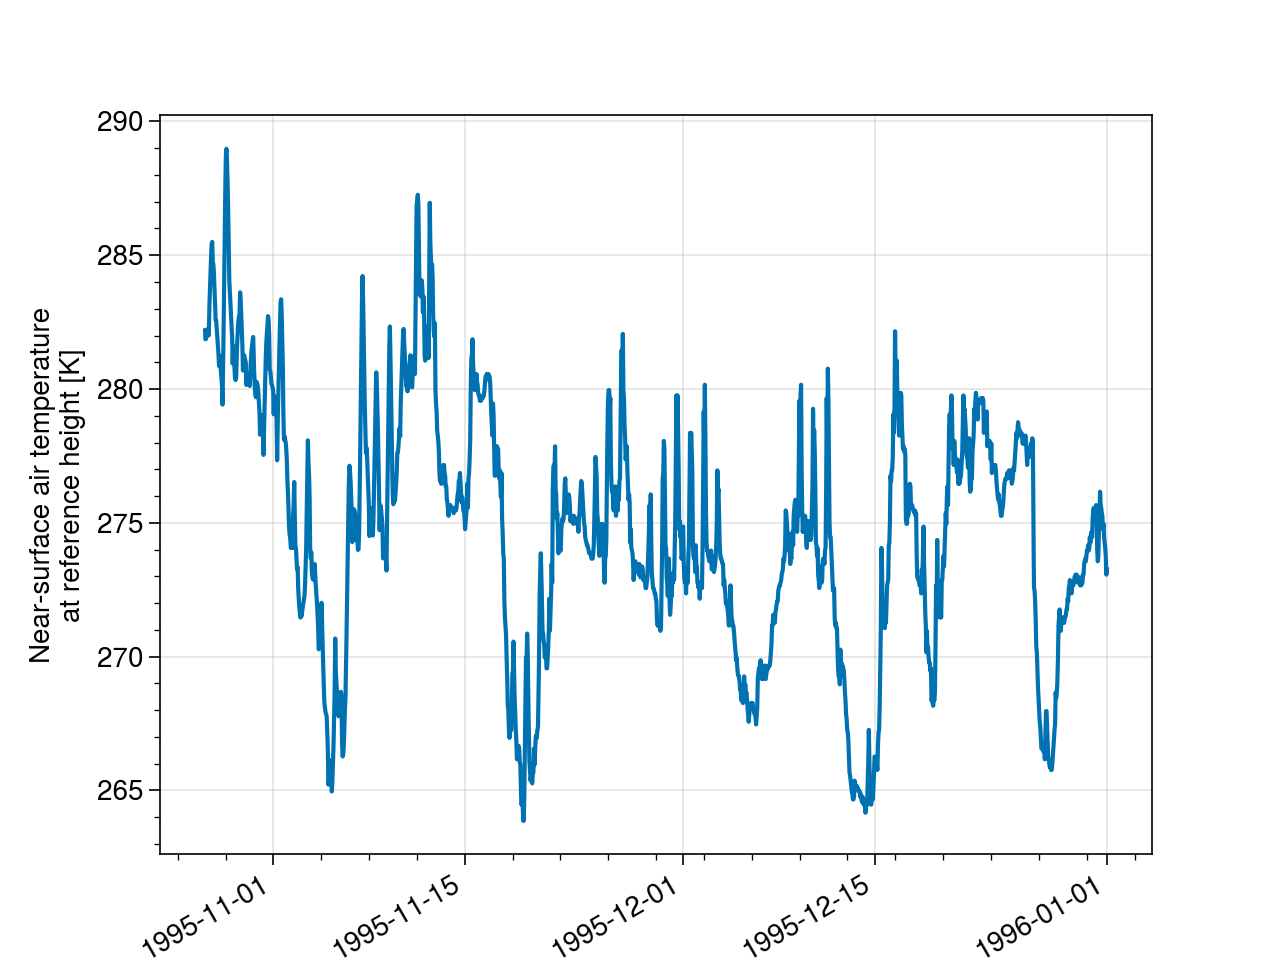

In [245]:
ds_halfhourly.tas.plot()
# ds_halfhourly.tcs.plot()


In [218]:
freq = 'daily'

#############
### Exp 1 ###
#############
label = 'run'

tas_daily = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
snc_daily = xr.open_dataset(path+'/snc_'+freq+'.nc').snc
snd_daily = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
snw_daily = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp_daily = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep_daily = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp_daily = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
lai_daily = xr.open_dataset(path+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model

albs_daily = xr.open_dataset(path+'/albs_'+freq+'.nc').albs
albsn_daily = xr.open_dataset(path+'/albsn_'+freq+'.nc').albsn

tsn_daily = xr.open_dataset(path+'/tsn_'+freq+'.nc').tsn
ts_daily = xr.open_dataset(path+'/ts_'+freq+'.nc').ts
wsnw_daily = xr.open_dataset(path+'/wsnw_'+freq+'.nc').wsnw
tsl_daily = xr.open_dataset(path+'/tsl_'+freq+'.nc').tsl
tcs_daily = xr.open_dataset(path+'/tcs_'+freq+'.nc').tcs

rss_daily = xr.open_dataset(path+'/rss_'+freq+'.nc').rss
rls_daily = xr.open_dataset(path+'/rls_'+freq+'.nc').rls
hfls_daily = xr.open_dataset(path+'/hfls_'+freq+'.nc').hfls
hfss_daily = xr.open_dataset(path+'/hfss_'+freq+'.nc').hfss


#############
### Exp 2 ###
#############
label2 = 'run_SCF_1'

tas_daily2 = xr.open_dataset(path2+'/tas_'+freq+'.nc').tas
snc_daily2 = xr.open_dataset(path2+'/snc_'+freq+'.nc').snc
snd_daily2 = xr.open_dataset(path2+'/snd_'+freq+'.nc').snd
snw_daily2 = xr.open_dataset(path2+'/snw_'+freq+'.nc').snw
nbp_daily2 = xr.open_dataset(path2+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep_daily2 = xr.open_dataset(path2+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp_daily2 = xr.open_dataset(path2+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
lai_daily2 = xr.open_dataset(path2+'/lai_'+freq+'.nc').lai # Carbon mass in the full depth of the soil model

albs_daily2 = xr.open_dataset(path2+'/albs_'+freq+'.nc').albs
albsn_daily2 = xr.open_dataset(path2+'/albsn_'+freq+'.nc').albsn

tsn_daily2 = xr.open_dataset(path2+'/tsn_'+freq+'.nc').tsn
ts_daily2 = xr.open_dataset(path2+'/ts_'+freq+'.nc').ts
wsnw_daily2 = xr.open_dataset(path2+'/wsnw_'+freq+'.nc').wsnw
tsl_daily2 = xr.open_dataset(path2+'/tsl_'+freq+'.nc').tsl
tcs_daily2 = xr.open_dataset(path2+'/tcs_'+freq+'.nc').tcs

rss_daily2 = xr.open_dataset(path2+'/rss_'+freq+'.nc').rss
rls_daily2 = xr.open_dataset(path2+'/rls_'+freq+'.nc').rls
hfls_daily2 = xr.open_dataset(path2+'/hfls_'+freq+'.nc').hfls
hfss_daily2 = xr.open_dataset(path2+'/hfss_'+freq+'.nc').hfss

Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

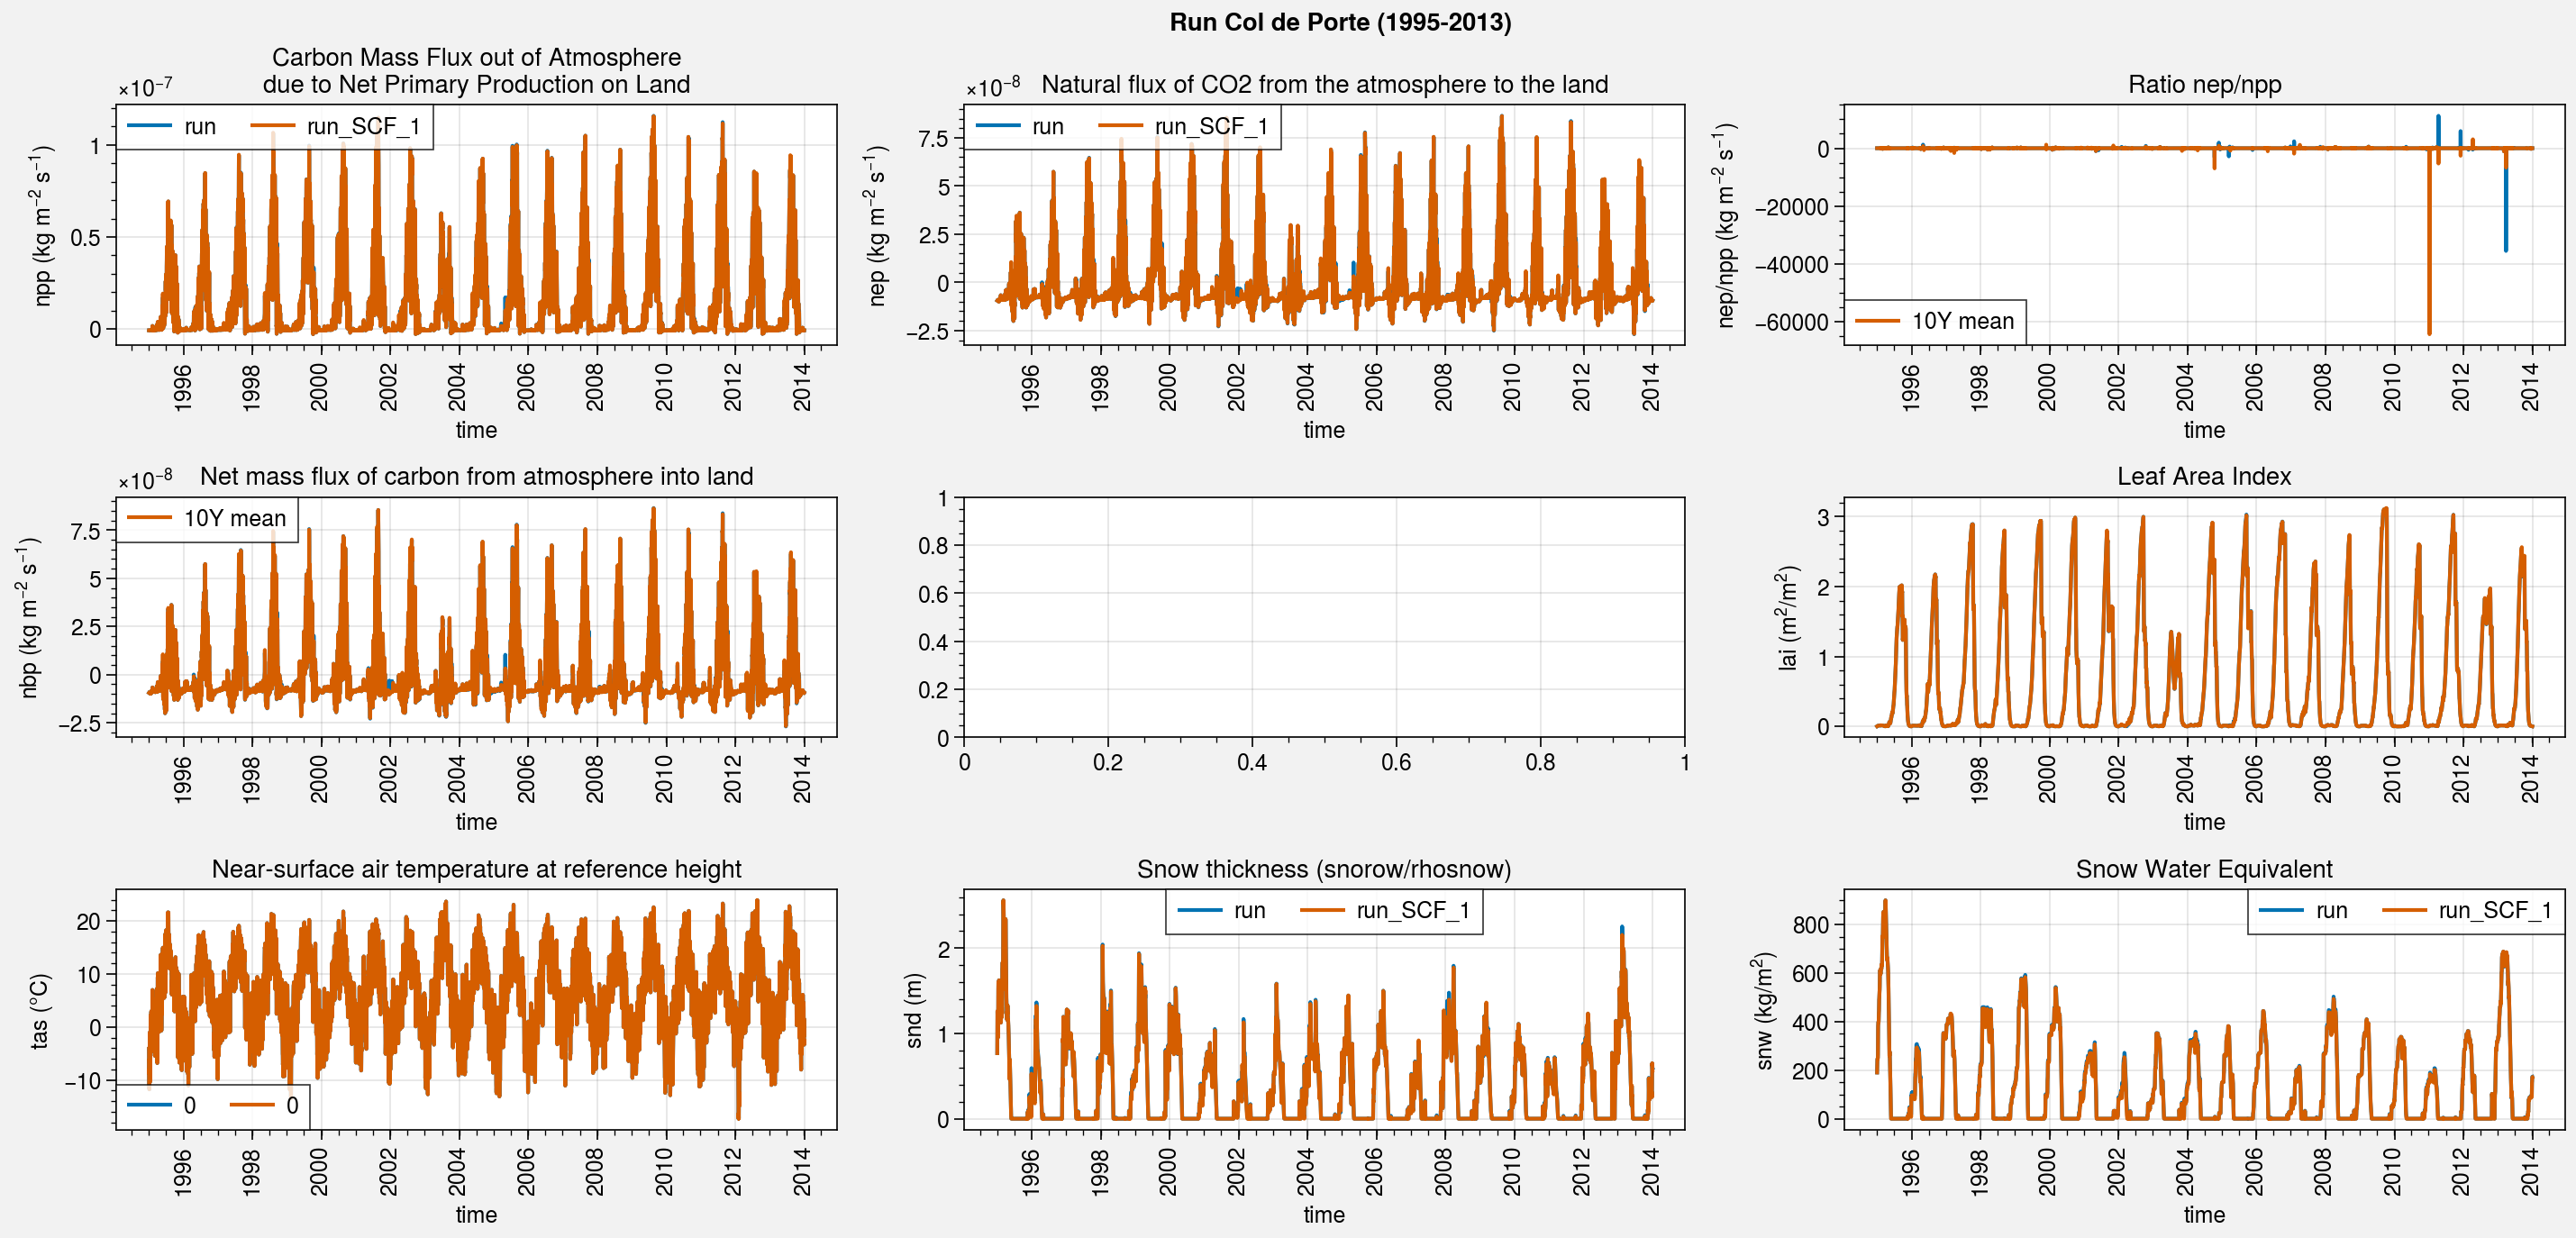

In [51]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp_daily, label=label)
axs[0].plot(npp_daily2, label=label2)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp_daily.units+')')
axs[0].legend()

# nep
axs[1].plot(nep_daily, label=label)
axs[1].plot(nep_daily2, label=label2)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep_daily.units+')')
axs[1].legend()

# nep/npp
axs[2].plot(nep_daily/npp_daily, label=label)
axs[2].plot(nep_daily2/npp_daily2, label=label2)
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep_daily.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp_daily, label=label)
axs[3].plot(nbp_daily2, label=label2)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp_daily.units+')')
axs[3].legend(k)

# cSoil
# axs[4].plot(cSoil_daily)
# axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil_daily.units+')')

# lai
axs[5].plot(lai_daily, label=label)
axs[5].plot(lai_daily2, label=label2)
axs[5].format(title=lai_daily.long_name, ylabel='lai ('+lai_daily.units+')')

# tas
axs[6].plot(tas_daily-273.15)
axs[6].plot(tas_daily2-273.15)
axs[6].format(title=tas_daily.long_name, ylabel='tas (°C)')
axs[6].legend()

# snd
axs[7].plot(snd_daily, label=label)
axs[7].plot(snd_daily2, label=label2)
axs[7].format(title=snd_daily.long_name, ylabel='snd ('+snd_daily.units+')')
axs[7].legend()

# snw
axs[8].plot(snw_daily, label=label)
axs[8].plot(snw_daily2, label=label2)
axs[8].format(title='Snow Water Equivalent', ylabel='snw ('+snw_daily.units+')')
axs[8].legend()

fig.suptitle('Run Col de Porte (1995-2013)')

Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

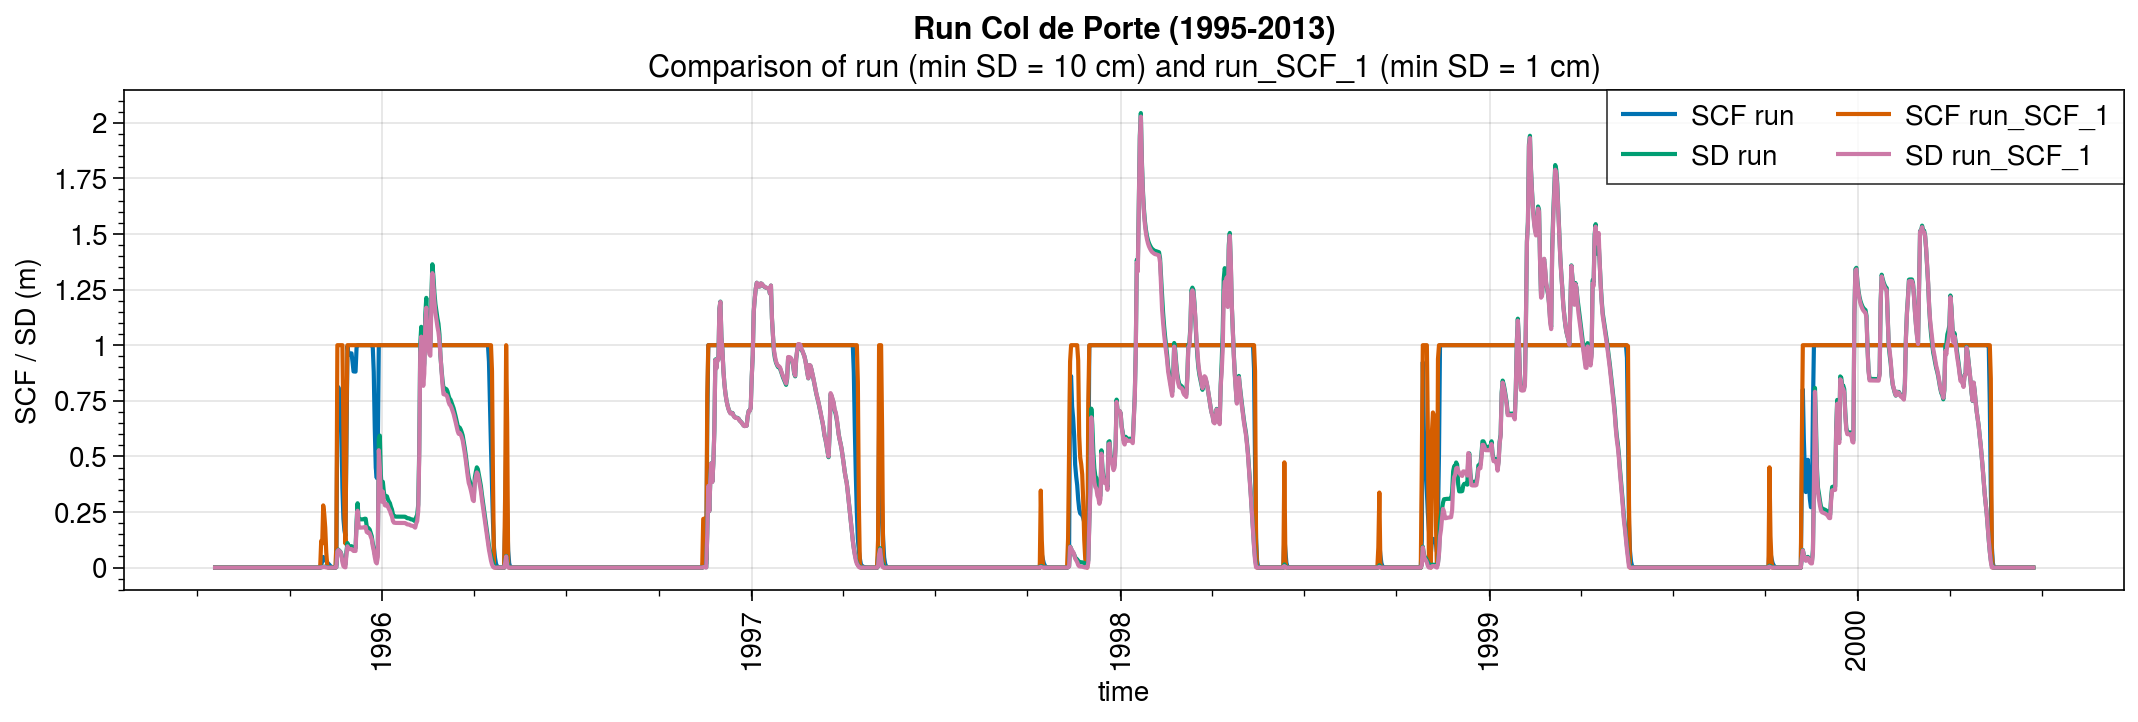

In [219]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=10)

i_start = 200
i_end = 2000

axs[0].plot(snc_daily[i_start:i_end], label='SCF '+label)
axs[0].plot(snc_daily2[i_start:i_end], label='SCF '+label2)
axs[0].plot(snd_daily[i_start:i_end], label='SD '+label)
axs[0].plot(snd_daily2[i_start:i_end], label='SD '+label2)

axs[0].legend(ncols=2)
axs[0].format(
    title='Comparison of run (min SD = 10 cm) and run_SCF_1 (min SD = 1 cm)',
    ylabel='SCF / SD (m)'
)
fig.suptitle('Run Col de Porte (1995-2013)')


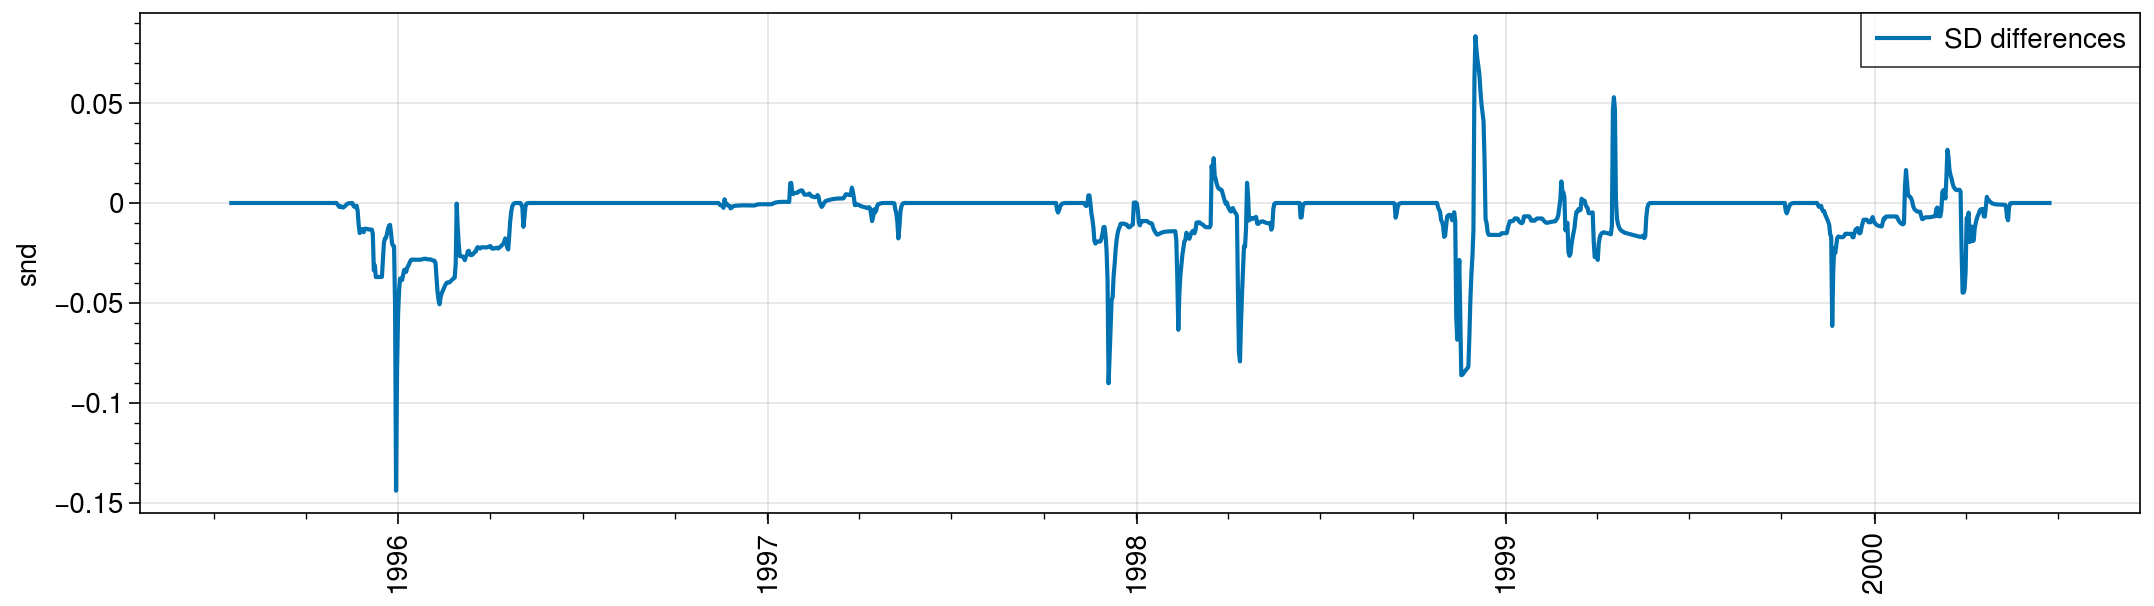

In [220]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=10)

i_start = 200
i_end = 2000

axs[0].plot(snd_daily2[i_start:i_end] - snd_daily[i_start:i_end], label='SD differences')
# axs[0].plot(rss_daily2[i_start:i_end] - rss_daily[i_start:i_end], label='Net shortwave')
# axs[0].plot(rls_daily2[i_start:i_end] - rls_daily[i_start:i_end], label='Net longwave')
# axs[0].plot(hfls_daily2[i_start:i_end] - hfls_daily[i_start:i_end], label='Latent Heat Flux')
# axs[0].plot(hfss_daily2[i_start:i_end] - hfss_daily[i_start:i_end], label='Sensible Heat Flux')

axs[0].legend()


In [160]:
5*30

150

Text(0.5, 0.98, 'Col de Porte')

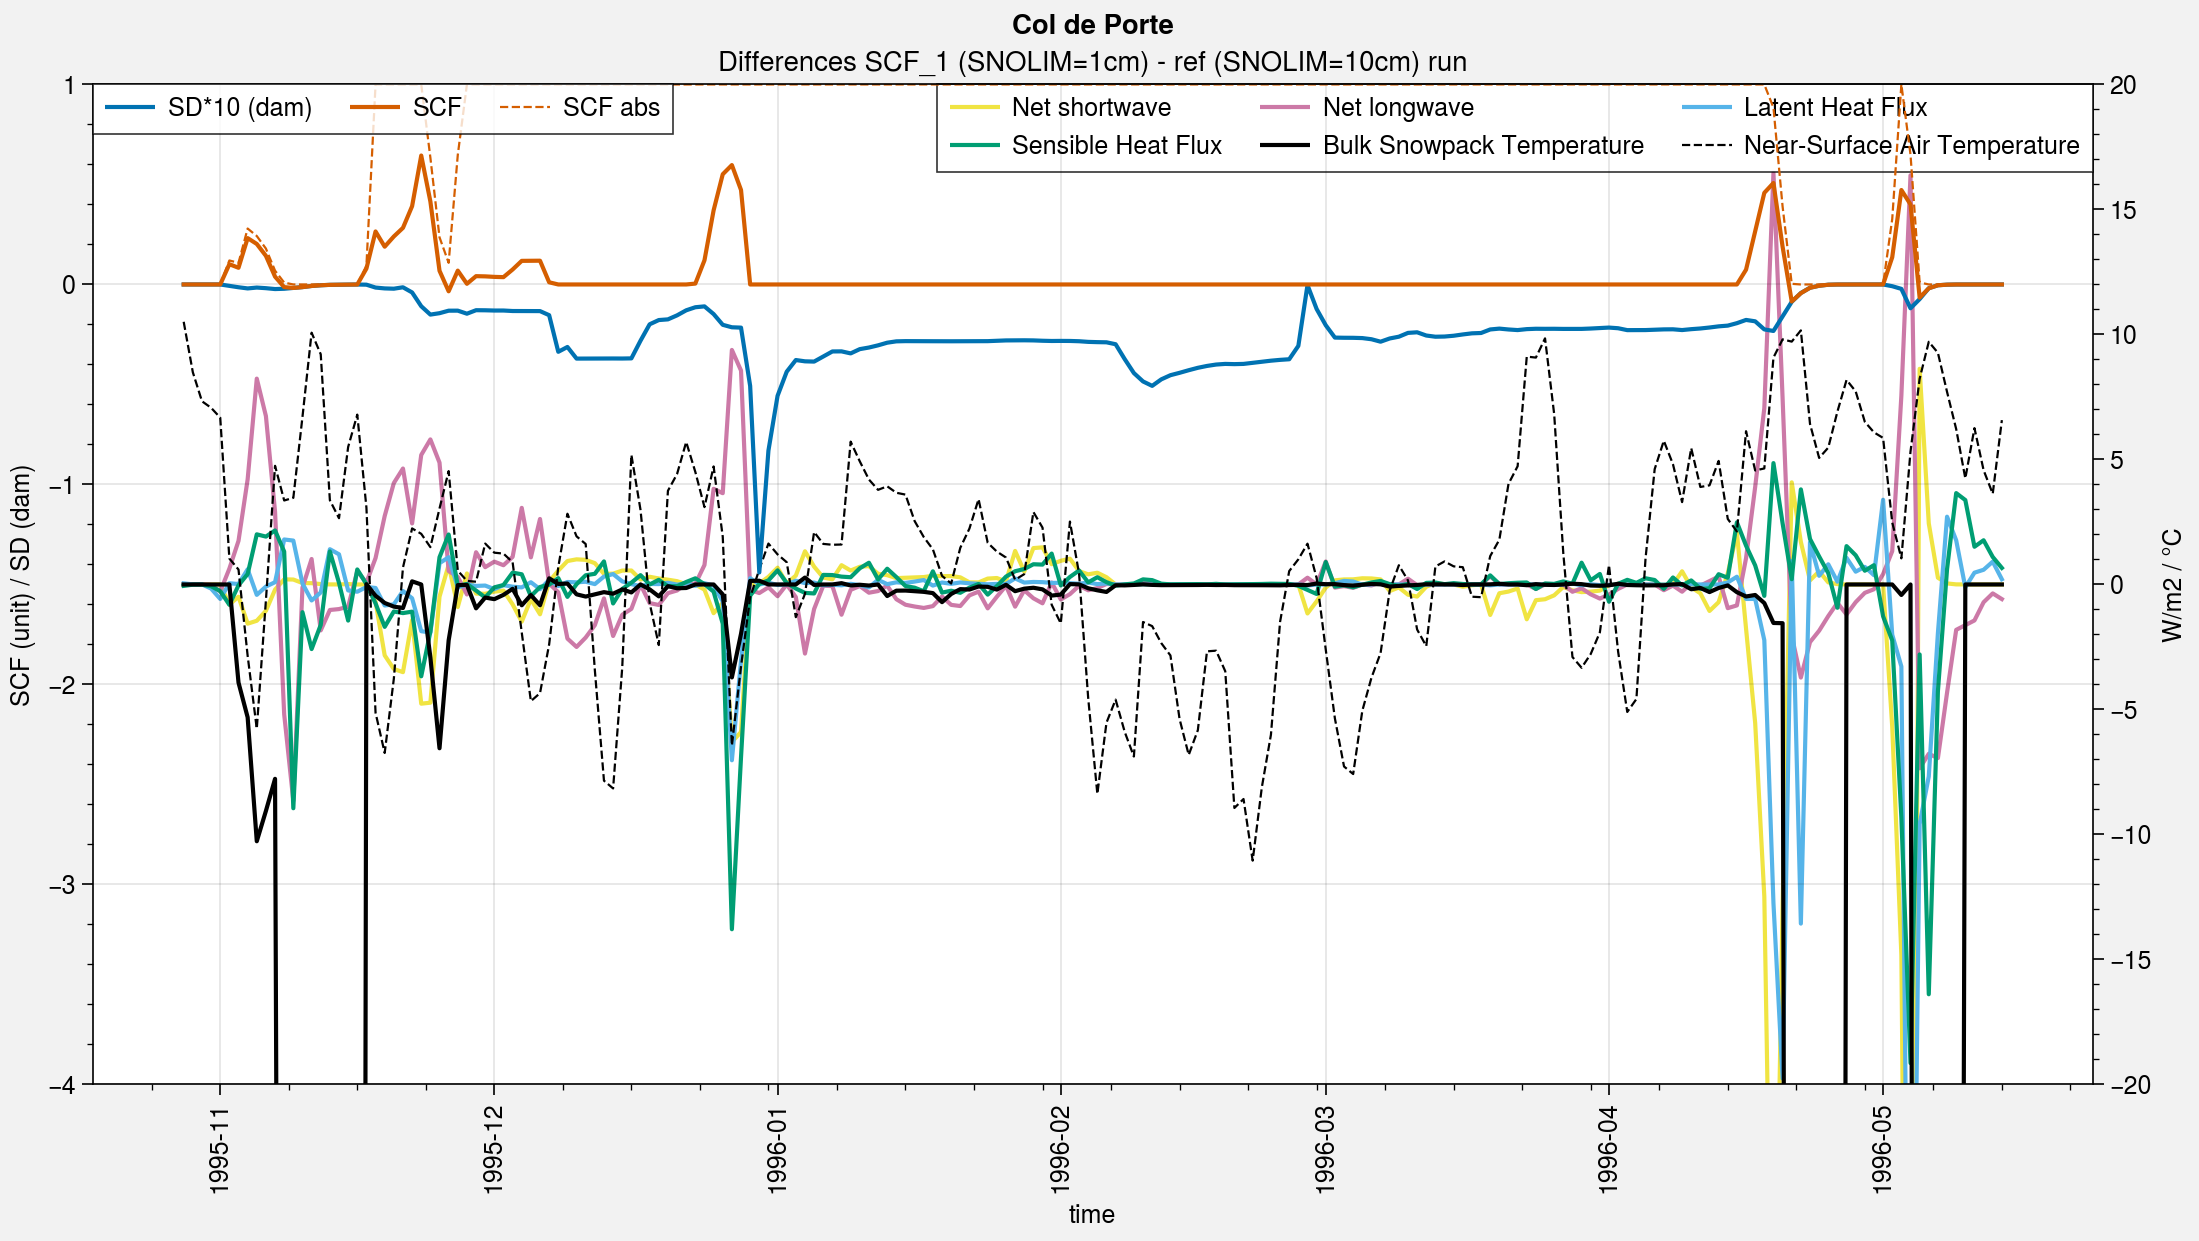

In [58]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = 300
i_end = 500

axs[0].plot((snd_daily2[i_start:i_end] - snd_daily[i_start:i_end])*10, label='SD*10 (dam)')
axs[0].plot((snc_daily2[i_start:i_end] - snc_daily[i_start:i_end]), label='SCF')
axs[0].plot(snc_daily2[i_start:i_end], label='SCF abs', ls='--', color='C1', lw=0.8)

ox = axs[0].alty(label='W/m2 / °C')
ox.plot(rss_daily2[i_start:i_end] - rss_daily[i_start:i_end], label='Net shortwave', color='C4')
ox.plot(rls_daily2[i_start:i_end] - rls_daily[i_start:i_end], label='Net longwave', color='C3')
ox.plot(hfls_daily2[i_start:i_end] - hfls_daily[i_start:i_end], label='Latent Heat Flux', color='C5')
ox.plot(hfss_daily2[i_start:i_end] - hfss_daily[i_start:i_end], label='Sensible Heat Flux', color='C2')
ox.plot((tsn_daily2[i_start:i_end] - tsn_daily[i_start:i_end]), label='Bulk Snowpack Temperature', color='k')
ox.plot(tas_daily[i_start:i_end]-273.15, label='Near-Surface Air Temperature', color='k', ls='--', lw=0.8)



ox.legend(loc='ur')
axs[0].legend(loc='ul')
axs[0].format(title='Differences SCF_1 (SNOLIM=1cm) - ref (SNOLIM=10cm) run', ylabel='SCF (unit) / SD (dam)')
ox.format(ylim=(-20, 20))
axs[0].format(ylim=(-4, 1))

fig.suptitle('Col de Porte')


## Half hourly outputs

Zoom on the begining of the snow season

In [283]:
freq = 'halfhourly'

#############
### Exp 1 ###
#############

tas_halfhourly = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
snc_halfhourly = xr.open_dataset(path+'/snc_'+freq+'.nc').snc
snd_halfhourly = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
snw_halfhourly = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
pr_halfhourly = xr.open_dataset(path+'/pr_'+freq+'.nc').pr

albs_halfhourly = xr.open_dataset(path+'/albs_'+freq+'.nc').albs
# albsn_halfhourly = xr.open_dataset(path+'/albsn_'+freq+'.nc').albsn

tsn_halfhourly = xr.open_dataset(path+'/tsn_'+freq+'.nc').tsn
ts_halfhourly = xr.open_dataset(path+'/ts_'+freq+'.nc').ts

tscs_halfhourly = xr.open_dataset(path+'/tscs_'+freq+'.nc').tscs
tsgs_halfhourly = xr.open_dataset(path+'/tsgs_'+freq+'.nc').tsgs
tsc_halfhourly = xr.open_dataset(path+'/tsc_'+freq+'.nc').tsc
tsg_halfhourly = xr.open_dataset(path+'/tsg_'+freq+'.nc').tsg

fcs_halfhourly = xr.open_dataset(path+'/fcs_'+freq+'.nc').fcs
fgs_halfhourly = xr.open_dataset(path+'/fgs_'+freq+'.nc').fgs
fc_halfhourly = xr.open_dataset(path+'/fc_'+freq+'.nc').fc
fg_halfhourly = xr.open_dataset(path+'/fg_'+freq+'.nc').fg

wsnw_halfhourly = xr.open_dataset(path+'/wsnw_'+freq+'.nc').wsnw
tsl_halfhourly = xr.open_dataset(path+'/tsl_'+freq+'.nc').tsl
tcs_halfhourly = xr.open_dataset(path+'/tcs_'+freq+'.nc').tcs

rss_halfhourly = xr.open_dataset(path+'/rss_'+freq+'.nc').rss
rls_halfhourly = xr.open_dataset(path+'/rls_'+freq+'.nc').rls
rlds_halfhourly = xr.open_dataset(path+'/rlds_'+freq+'.nc').rlds
hfls_halfhourly = xr.open_dataset(path+'/hfls_'+freq+'.nc').hfls
hfss_halfhourly = xr.open_dataset(path+'/hfss_'+freq+'.nc').hfss


#############
### Exp 2 ###
#############

tas_halfhourly2 = xr.open_dataset(path2+'/tas_'+freq+'.nc').tas
snc_halfhourly2 = xr.open_dataset(path2+'/snc_'+freq+'.nc').snc
snd_halfhourly2 = xr.open_dataset(path2+'/snd_'+freq+'.nc').snd
snw_halfhourly2 = xr.open_dataset(path2+'/snw_'+freq+'.nc').snw
pr_halfhourly2 = xr.open_dataset(path2+'/pr_'+freq+'.nc').pr

albs_halfhourly2 = xr.open_dataset(path2+'/albs_'+freq+'.nc').albs
# albsn_halfhourly2 = xr.open_dataset(path2+'/albsn_'+freq+'.nc').albsn

tsn_halfhourly2 = xr.open_dataset(path2+'/tsn_'+freq+'.nc').tsn
ts_halfhourly2 = xr.open_dataset(path2+'/ts_'+freq+'.nc').ts
wsnw_halfhourly2 = xr.open_dataset(path2+'/wsnw_'+freq+'.nc').wsnw
tsl_halfhourly2 = xr.open_dataset(path2+'/tsl_'+freq+'.nc').tsl
tcs_halfhourly2 = xr.open_dataset(path2+'/tcs_'+freq+'.nc').tcs

rss_halfhourly2 = xr.open_dataset(path2+'/rss_'+freq+'.nc').rss
rls_halfhourly2 = xr.open_dataset(path2+'/rls_'+freq+'.nc').rls
rlds_halfhourly2 = xr.open_dataset(path2+'/rlds_'+freq+'.nc').rlds
hfls_halfhourly2 = xr.open_dataset(path2+'/hfls_'+freq+'.nc').hfls
hfss_halfhourly2 = xr.open_dataset(path2+'/hfss_'+freq+'.nc').hfss

Text(0.5, 0.98, 'Col de Porte')

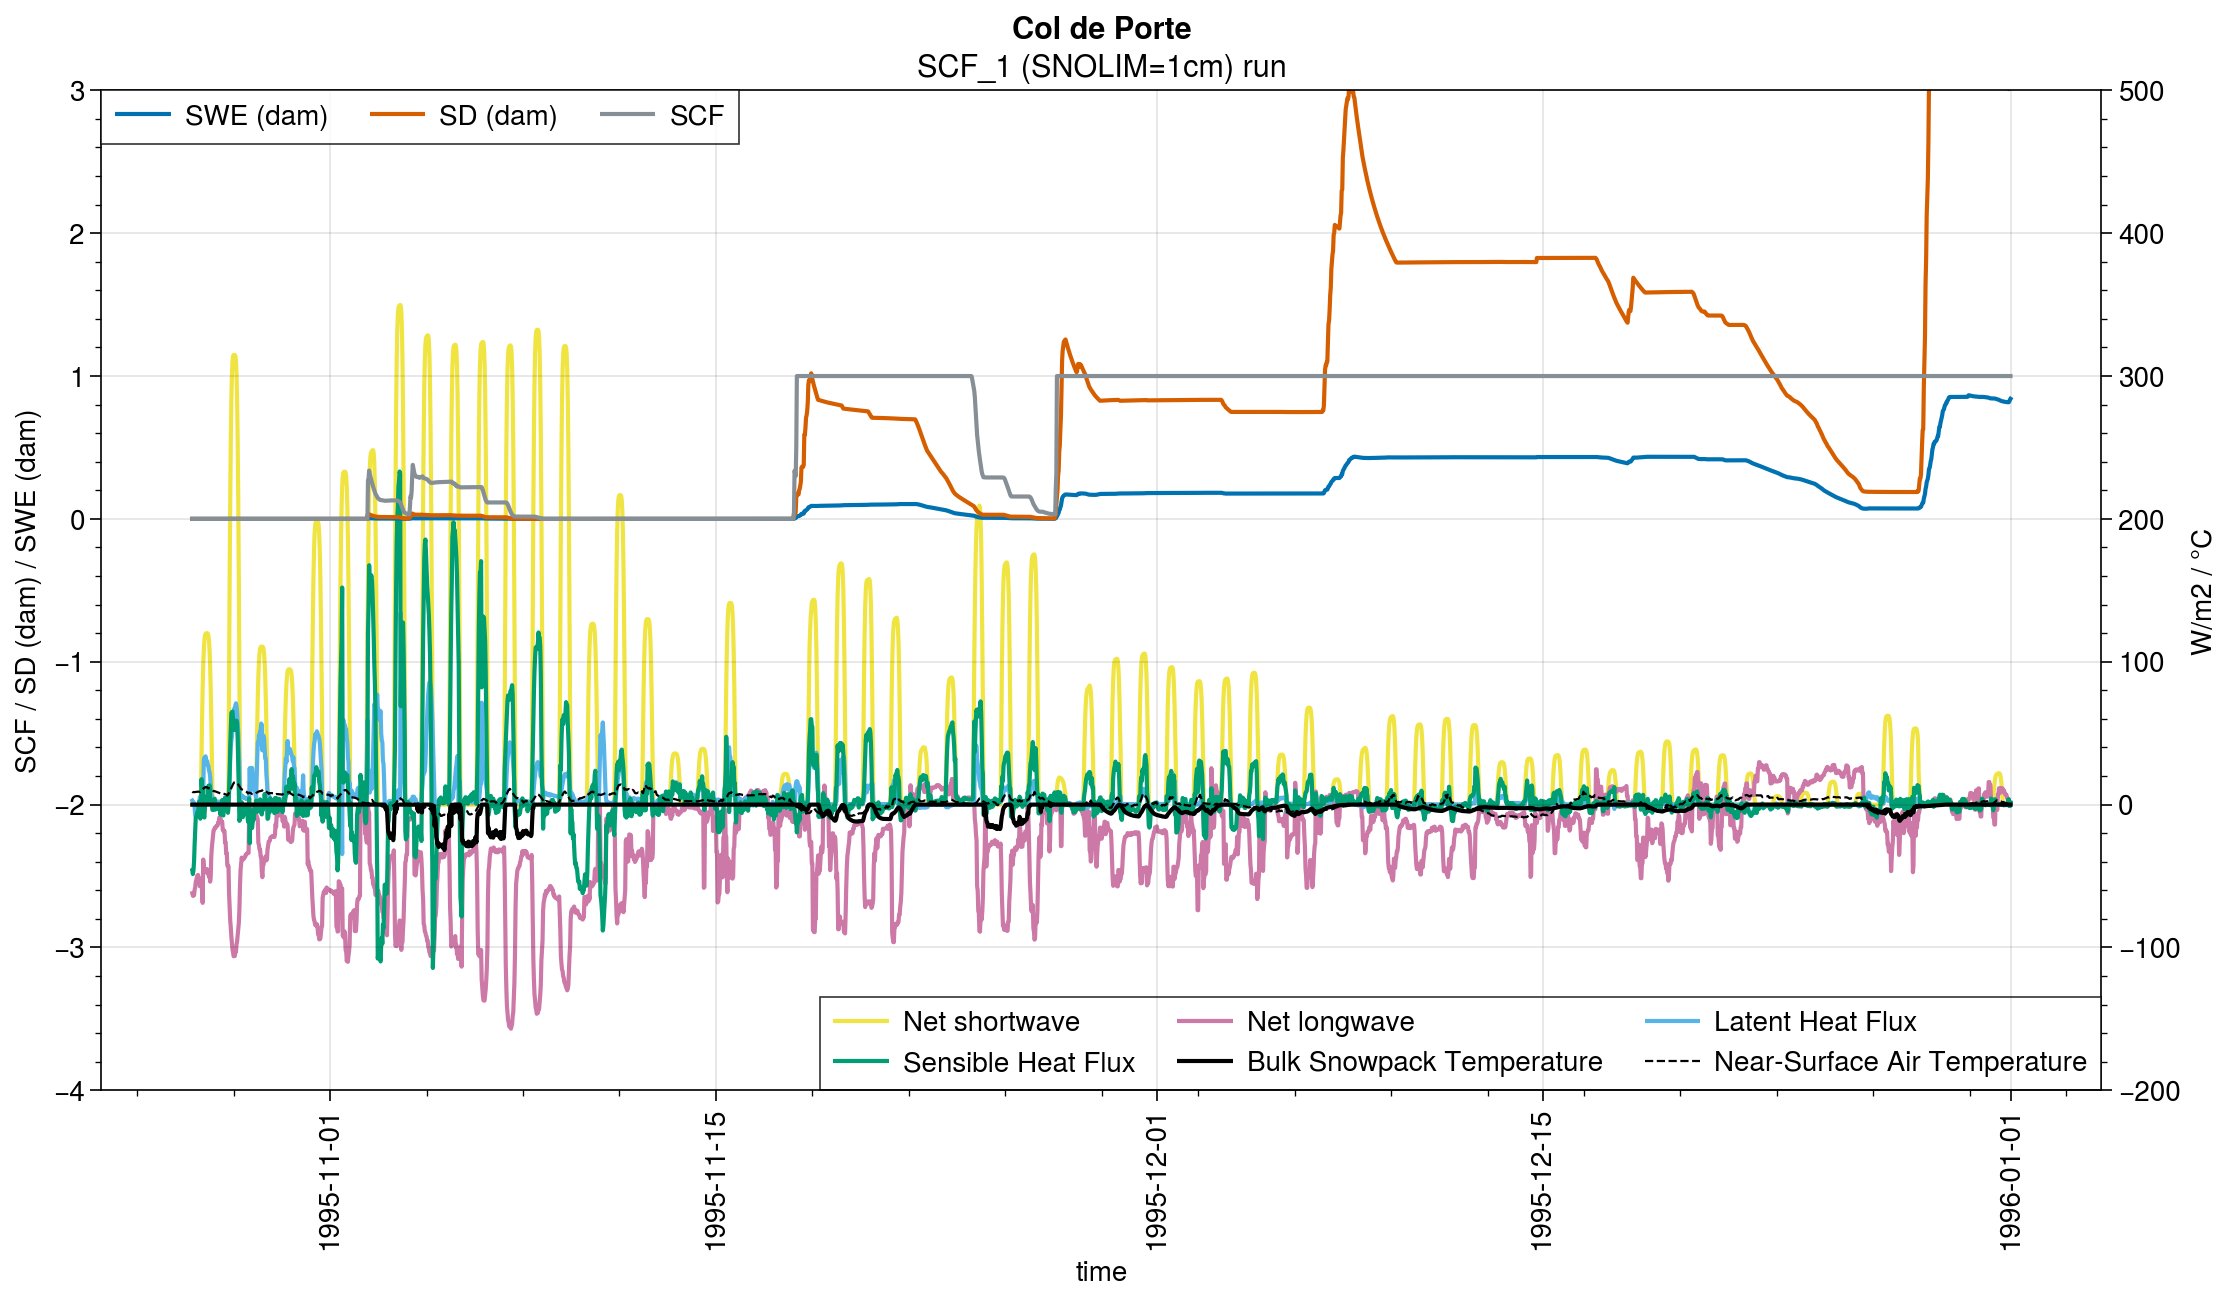

In [222]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

axs[0].plot(snw_halfhourly2*1e-3*10, label='SWE (dam)')
axs[0].plot(snd_halfhourly2*10, label='SD (dam)')
axs[0].plot(snc_halfhourly2, label='SCF', color='gray6')

ox = axs[0].alty(label='W/m2 / °C')
ox.plot(rss_halfhourly2, label='Net shortwave', color='C4')
ox.plot(rls_halfhourly2, label='Net longwave', color='C3')
ox.plot(hfls_halfhourly2, label='Latent Heat Flux', color='C5')
ox.plot(hfss_halfhourly2, label='Sensible Heat Flux', color='C2')
ox.plot(tsn_halfhourly2, label='Bulk Snowpack Temperature', color='k')
ox.plot(tas_halfhourly2-273.15, label='Near-Surface Air Temperature', color='k', ls='--', lw=0.8)



ox.legend(loc='lr')
axs[0].legend(loc='ul')
axs[0].format(title='SCF_1 (SNOLIM=1cm) run', ylabel='SCF / SD (dam) / SWE (dam)')
ox.format(ylim=(-200, 500))
axs[0].format(ylim=(-4, 3))

fig.suptitle('Col de Porte')


In [129]:
path = '/home/lalandmi/Dropbox/data/SnowMIP/forcing'
forcing = xr.open_dataset(path+'/met_insitu_cdp_1994_2014.nc')

In [131]:
forcing.LWdown

<xarray.DataArray 'LWdown' (time: 175320)>
[175320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Attributes:
    ALMA_name:  LWdown
    CMIP_name:  rlds
    long_name:  Surface downward longwave radiation
    units:      W/m2

In [149]:
ts_halfhourly2

<xarray.DataArray 'ts' (time: 3168, lat: 1, lon: 1)>
array([[[280.8475]],

       [[280.8475]],

       ...,

       [[273.16  ]],

       [[273.16  ]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-10-27 ... 1995-12-31T23:30:00
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Surface (skin) temperature
    units:       K
    nameInCode:  tsurf_hh

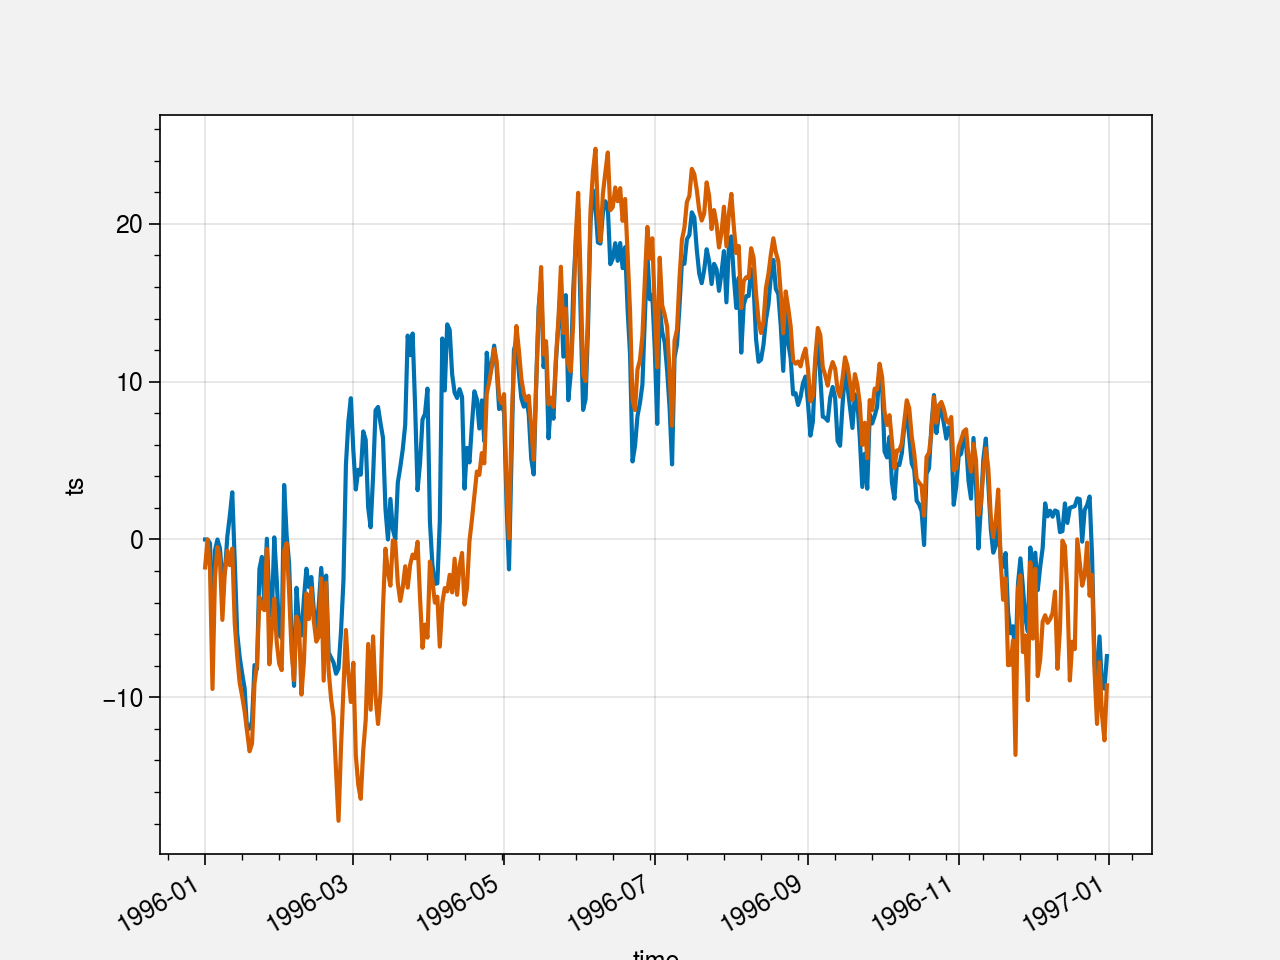

In [165]:
tcs_daily.sel(time=slice('1996', '1996')).plot()
(ts_daily.sel(time=slice('1996', '1996'))-273.15).plot()

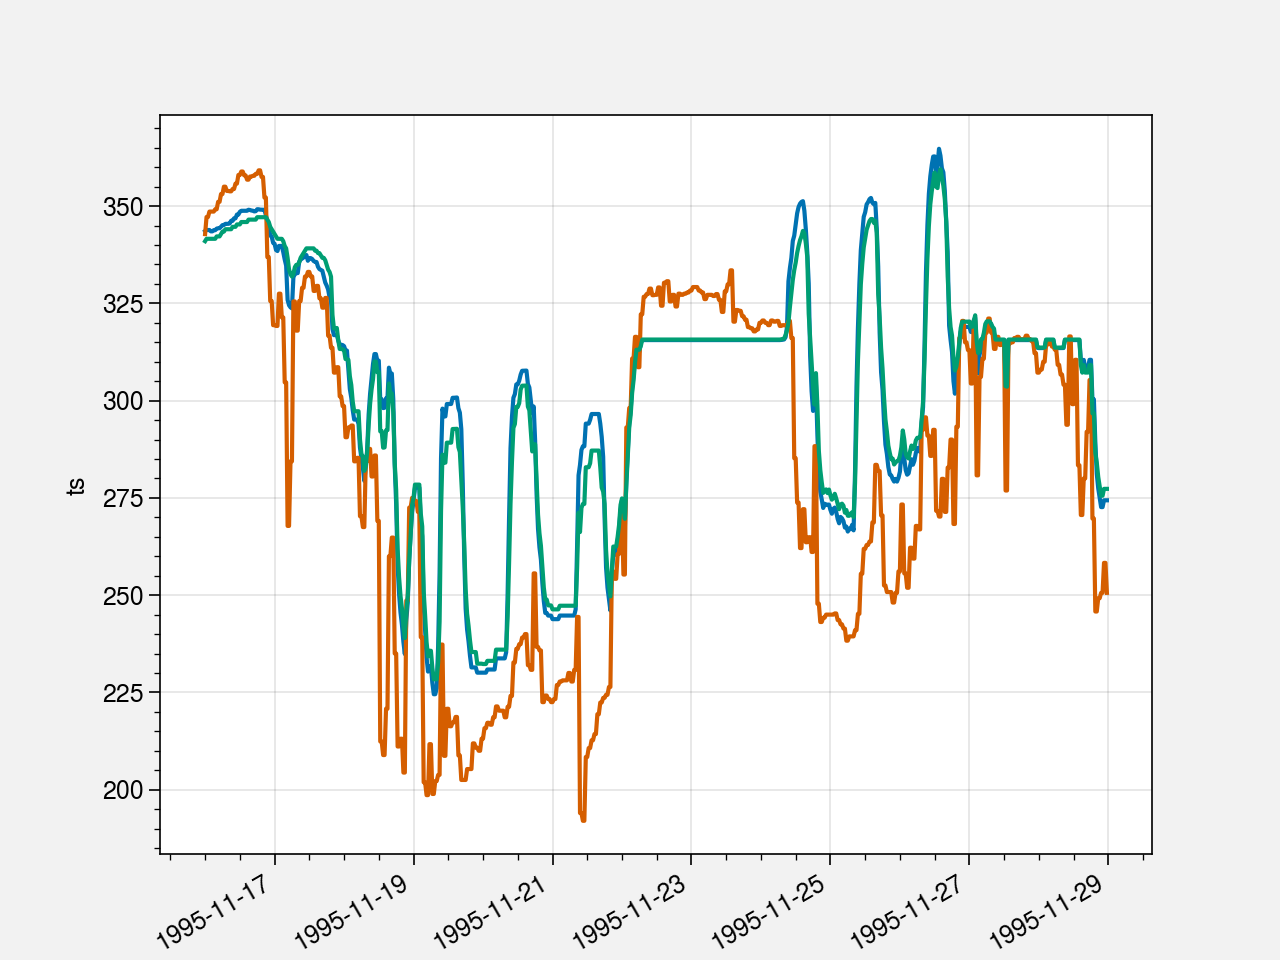

In [154]:
(rlds_halfhourly2 - rls_halfhourly2).sel(time=slice(i_start, i_end)).plot()
rlds_halfhourly2.sel(time=slice(i_start, i_end)).plot()
(5.670374419e-8*(ts_halfhourly2.sel(time=slice(i_start, i_end)))**4).plot()

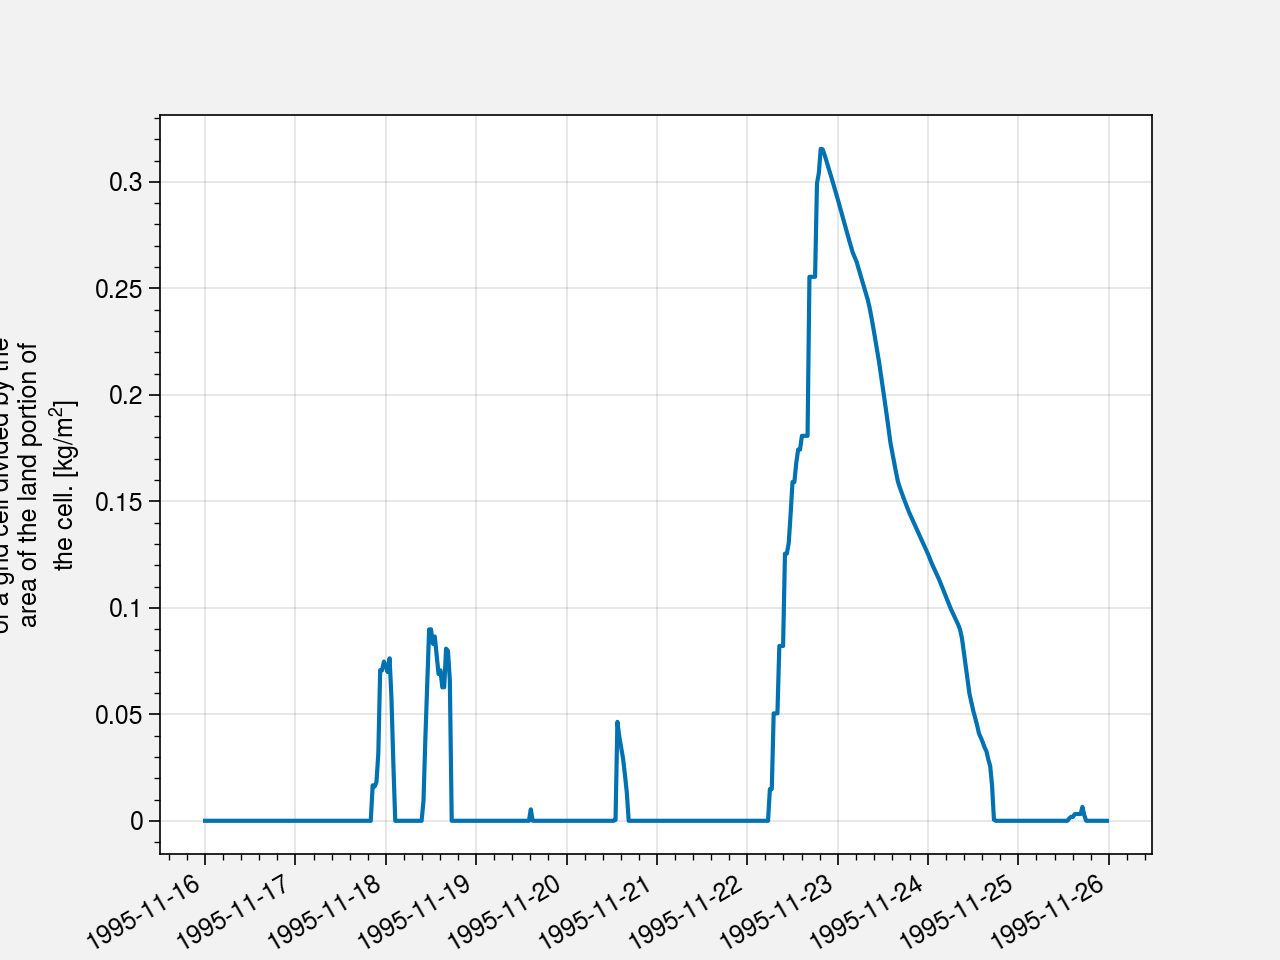

In [180]:
wsnw_halfhourly2.sel(time=slice(i_start, i_end)).plot()

Text(0.5, 0.98, 'Col de Porte')

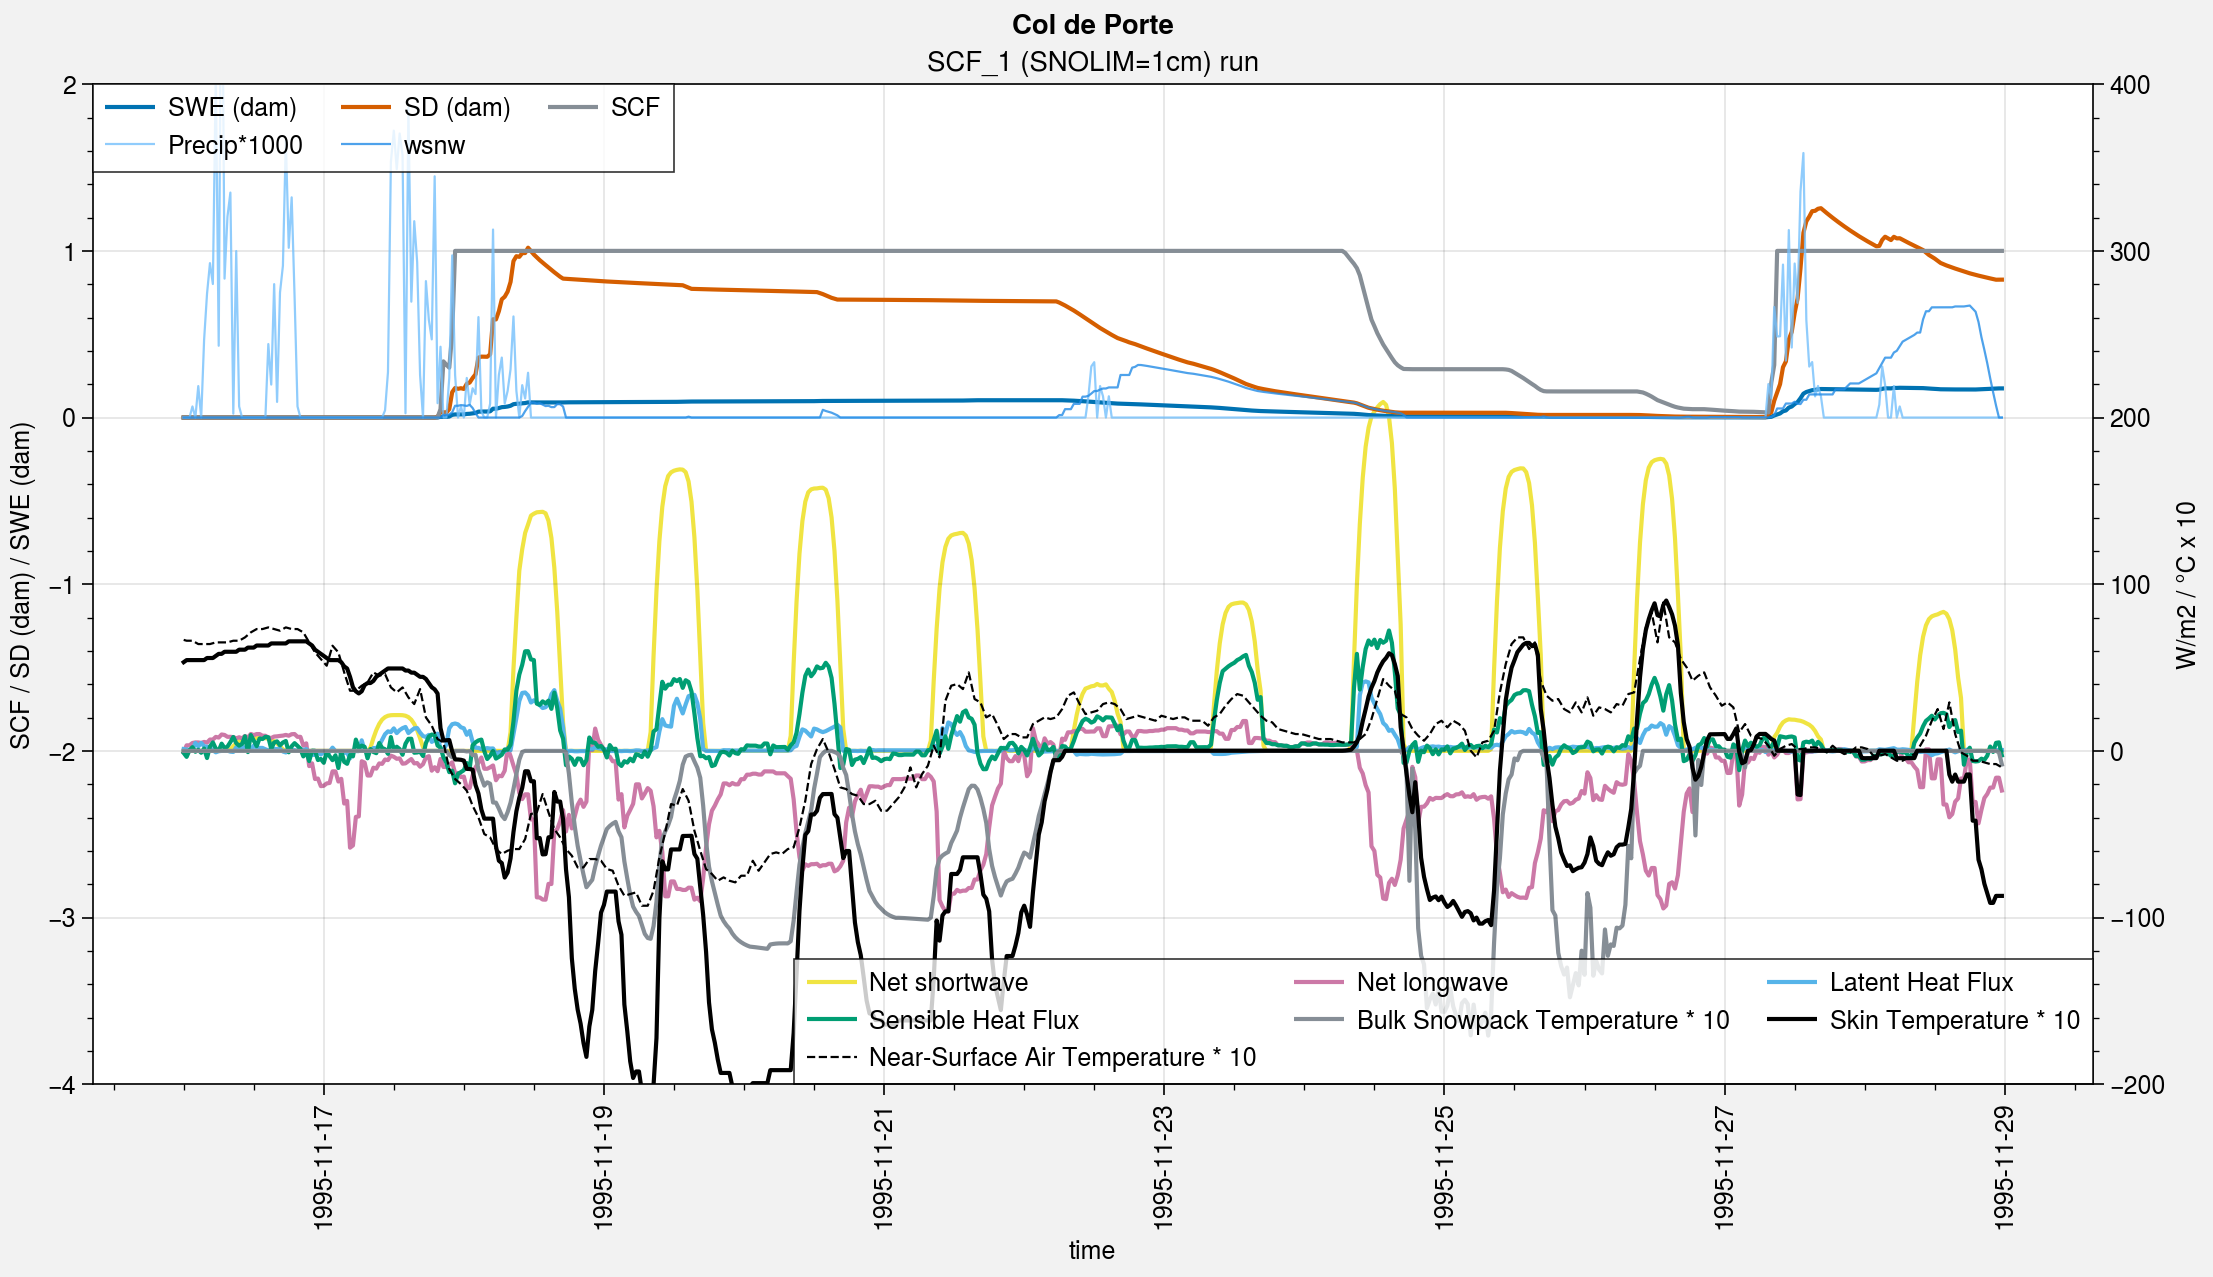

In [181]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = '1995-11-16'
i_end = '1995-11-28'

axs[0].plot(snw_halfhourly2.sel(time=slice(i_start, i_end))*1e-3*10, label='SWE (dam)')
axs[0].plot(snd_halfhourly2.sel(time=slice(i_start, i_end))*10, label='SD (dam)')
axs[0].plot(snc_halfhourly2.sel(time=slice(i_start, i_end)), label='SCF', color='gray6')
axs[0].plot(pr_halfhourly2.sel(time=slice(i_start, i_end))*1e3, label='Precip*1000', color='blue3', alpha=0.8, lw=0.8)
axs[0].plot(wsnw_halfhourly2.sel(time=slice(i_start, i_end)), label='wsnw', color='blue6', alpha=0.8, lw=0.8)

ox = axs[0].alty(label='W/m2 / °C x 10')
ox.plot(rss_halfhourly2.sel(time=slice(i_start, i_end)), label='Net shortwave', color='C4')
ox.plot(rls_halfhourly2.sel(time=slice(i_start, i_end)), label='Net longwave', color='C3')
ox.plot(hfls_halfhourly2.sel(time=slice(i_start, i_end)), label='Latent Heat Flux', color='C5')
ox.plot(hfss_halfhourly2.sel(time=slice(i_start, i_end)), label='Sensible Heat Flux', color='C2')
ox.plot((tsn_halfhourly2.sel(time=slice(i_start, i_end)))*10, label='Bulk Snowpack Temperature * 10', color='gray6')
ox.plot((ts_halfhourly2.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature * 10', color='k')
ox.plot((tas_halfhourly2.sel(time=slice(i_start, i_end))-273.15)*10, label='Near-Surface Air Temperature * 10', color='k', ls='--', lw=0.8)



ox.legend(loc='lr')
axs[0].legend(loc='ul')
axs[0].format(title='SCF_1 (SNOLIM=1cm) run', ylabel='SCF / SD (dam) / SWE (dam)')
ox.format(ylim=(-200, 400))
axs[0].format(ylim=(-4, 2))

fig.suptitle('Col de Porte')


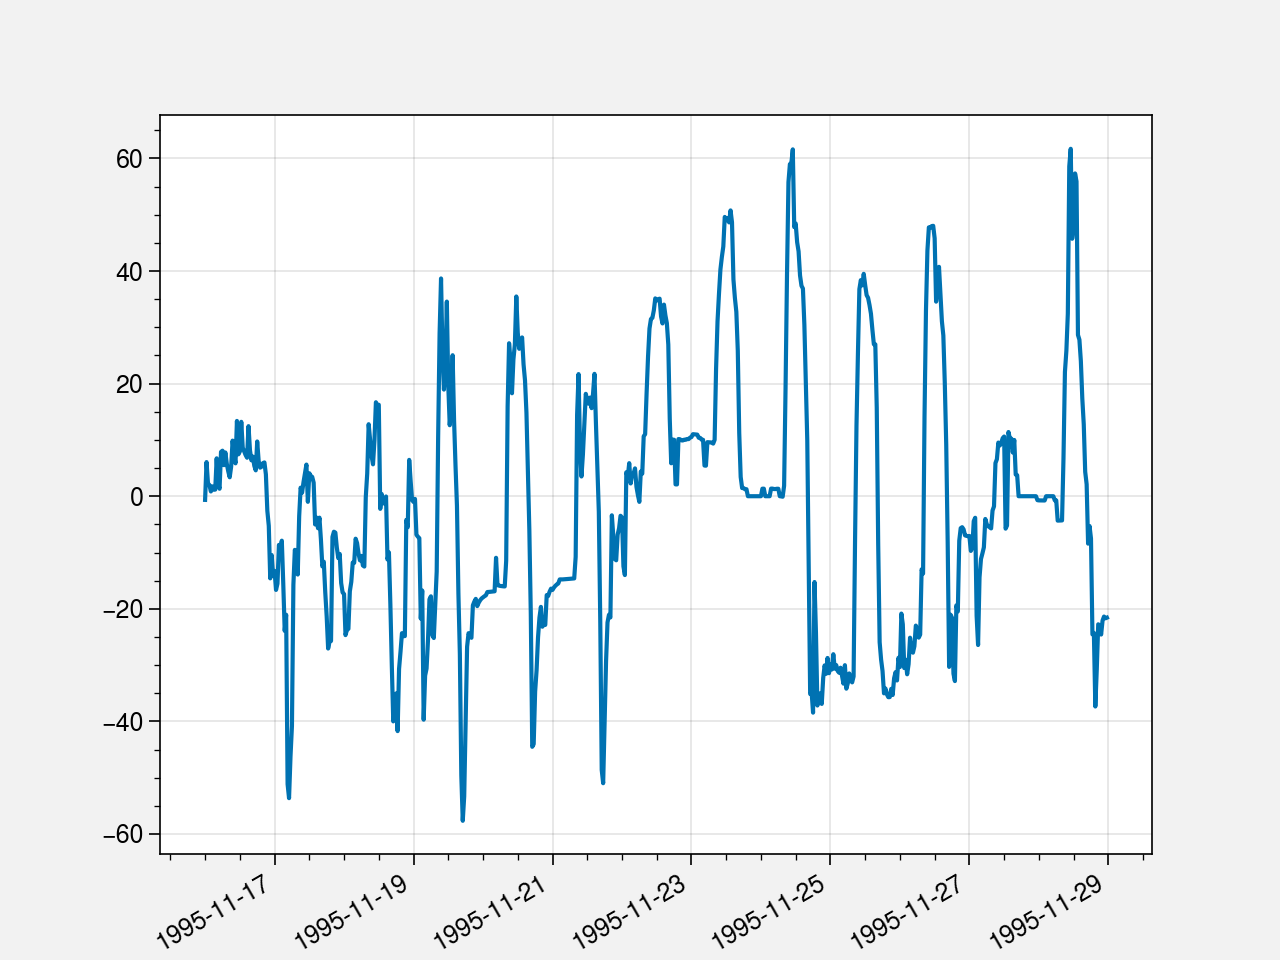

In [167]:
(rss_halfhourly2 + rls_halfhourly2 - hfls_halfhourly2 - hfss_halfhourly2).sel(time=slice(i_start, i_end)).plot()

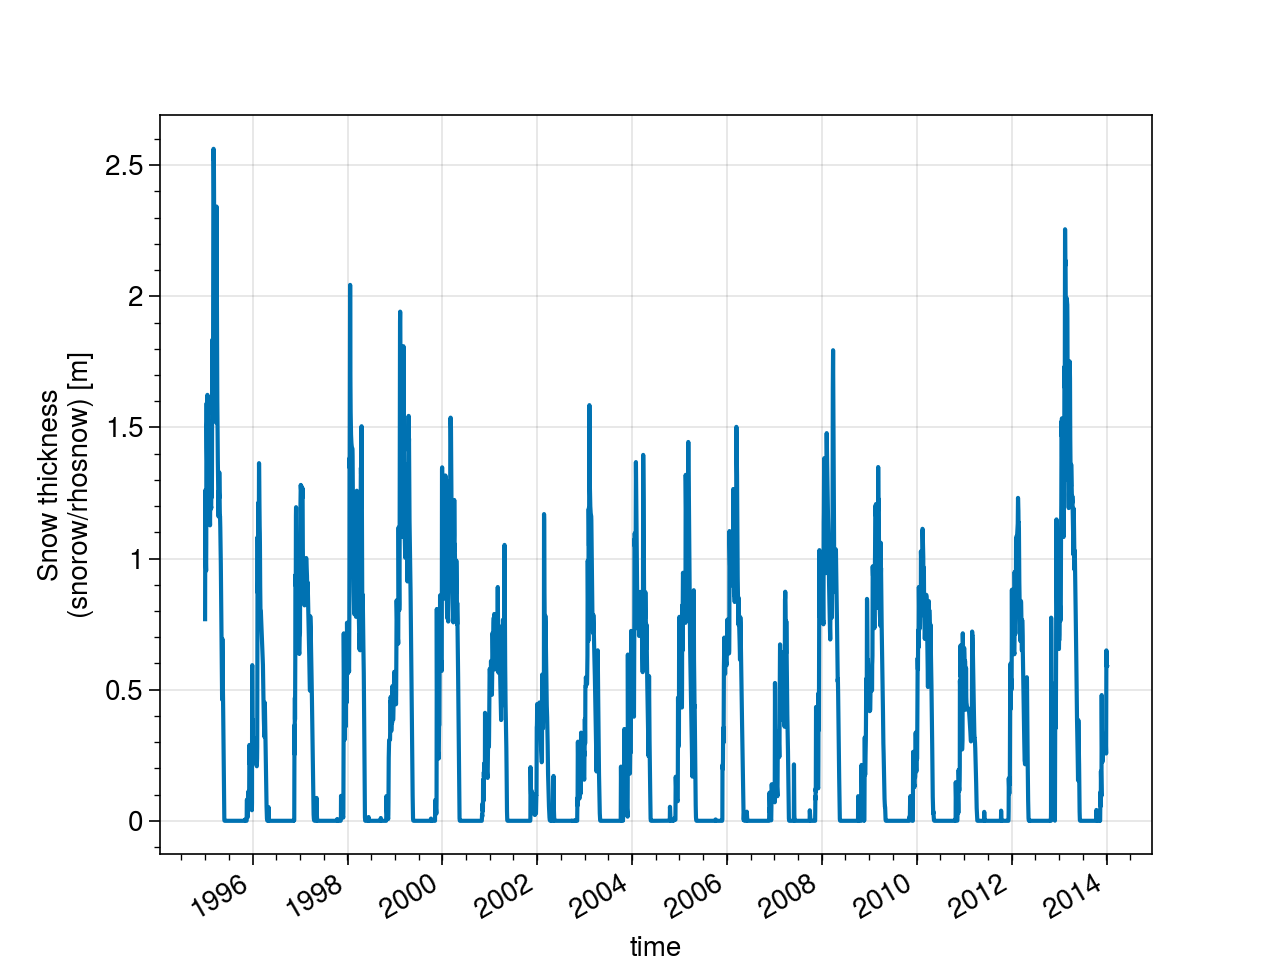

In [204]:
snd_daily.plot()

In [210]:
tsn_halfhourly2

<xarray.DataArray 'tsn' (time: 3168, lat: 1, lon: 1)>
array([[[ 0.000000e+00]],

       [[ 0.000000e+00]],

       ...,

       [[ 0.000000e+00]],

       [[-5.684342e-14]]])
Coordinates:
  * time     (time) datetime64[ns] 1995-10-27 ... 1995-12-31T23:30:00
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Bulk temperature of the snow, not the surface (skin) tempera...
    units:       $^\circ$C
    nameInCode:  tsno_hh

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


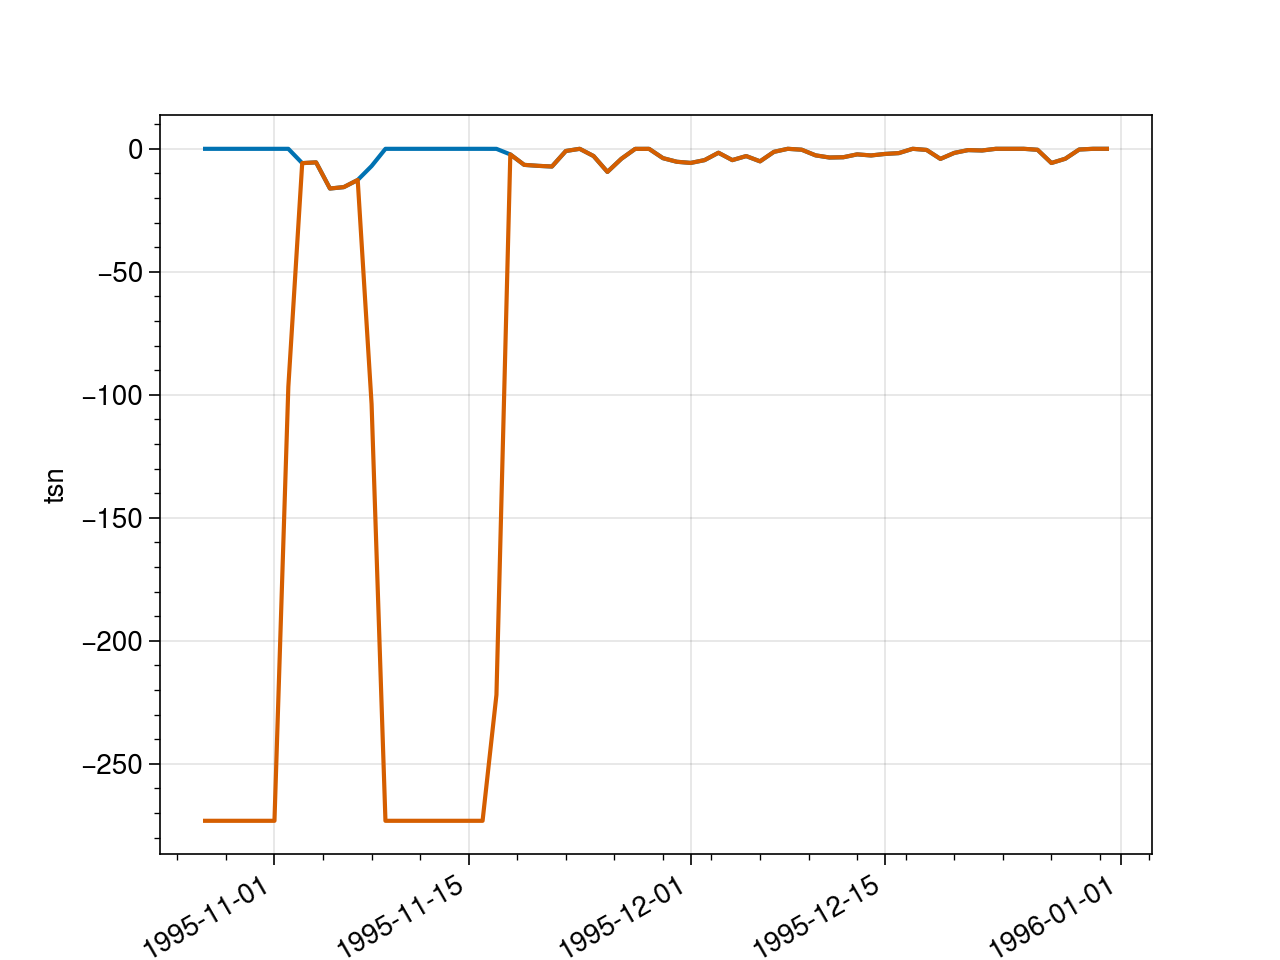

In [213]:
tsn_halfhourly2.resample(time='d').mean().plot()
(tsn_daily2.sel(time=slice('1995-10-27', '1995-12-31'))-273.15).plot()

In [247]:
path_SnowMIP_eval = '/home/lalandmi/Dropbox/data/SnowMIP/evaluation/FR-Cdp/Morin_2012/datasets'
df = pd.read_csv(path_SnowMIP_eval+'/CDP_daily_eval.tab', skiprows=23, delimiter='\t', infer_datetime_format=True, index_col=0)
df.index = pd.to_datetime(df.index)
df

Snow thick [m] (automated measurement, Ultra-...)  \
Date/Time                                                       
1993-09-21                                                0.0   
1993-09-22                                                0.0   
1993-09-23                                                0.0   
1993-09-24                                                0.0   
1993-09-25                                                0.0   
...                                                       ...   
2011-06-08                                                0.0   
2011-06-09                                                0.0   
2011-06-10                                                NaN   
2011-06-11                                                NaN   
2011-06-12                                                NaN   

            Snow thick [m] (pit, Ruler stick)  \
Date/Time                                       
1993-09-21                                NaN   
1993-09-22                                NaN   
1993-09-23                                NaN   
1993-09-24                                NaN   
1993-09-25                                NaN   
...                                       ...   
2011-06-08                                NaN   
2011-06-09                                NaN   
2011-06-10                                NaN   
2011-06-11                                NaN   
2011-06-12                                NaN   

            Snow thick [m] (pit south, Ruler stick)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      NaN   
2011-06-09                                      NaN   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            Snow thick [m] (pit north, Ruler stick)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      NaN   
2011-06-09                                      NaN   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            SWE [kg/m**2] (Cosmic Ray Counter, NRC)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      0.0   
2011-06-09                                      0.0   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            SWE [kg/m**2] (pit, Calculated from weight o...)  \
Date/Time                                                      
1993-09-21                                               NaN   
1993-09-22                                               NaN   
1993-09-23                                               NaN   
1993-09-24                                               NaN

Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

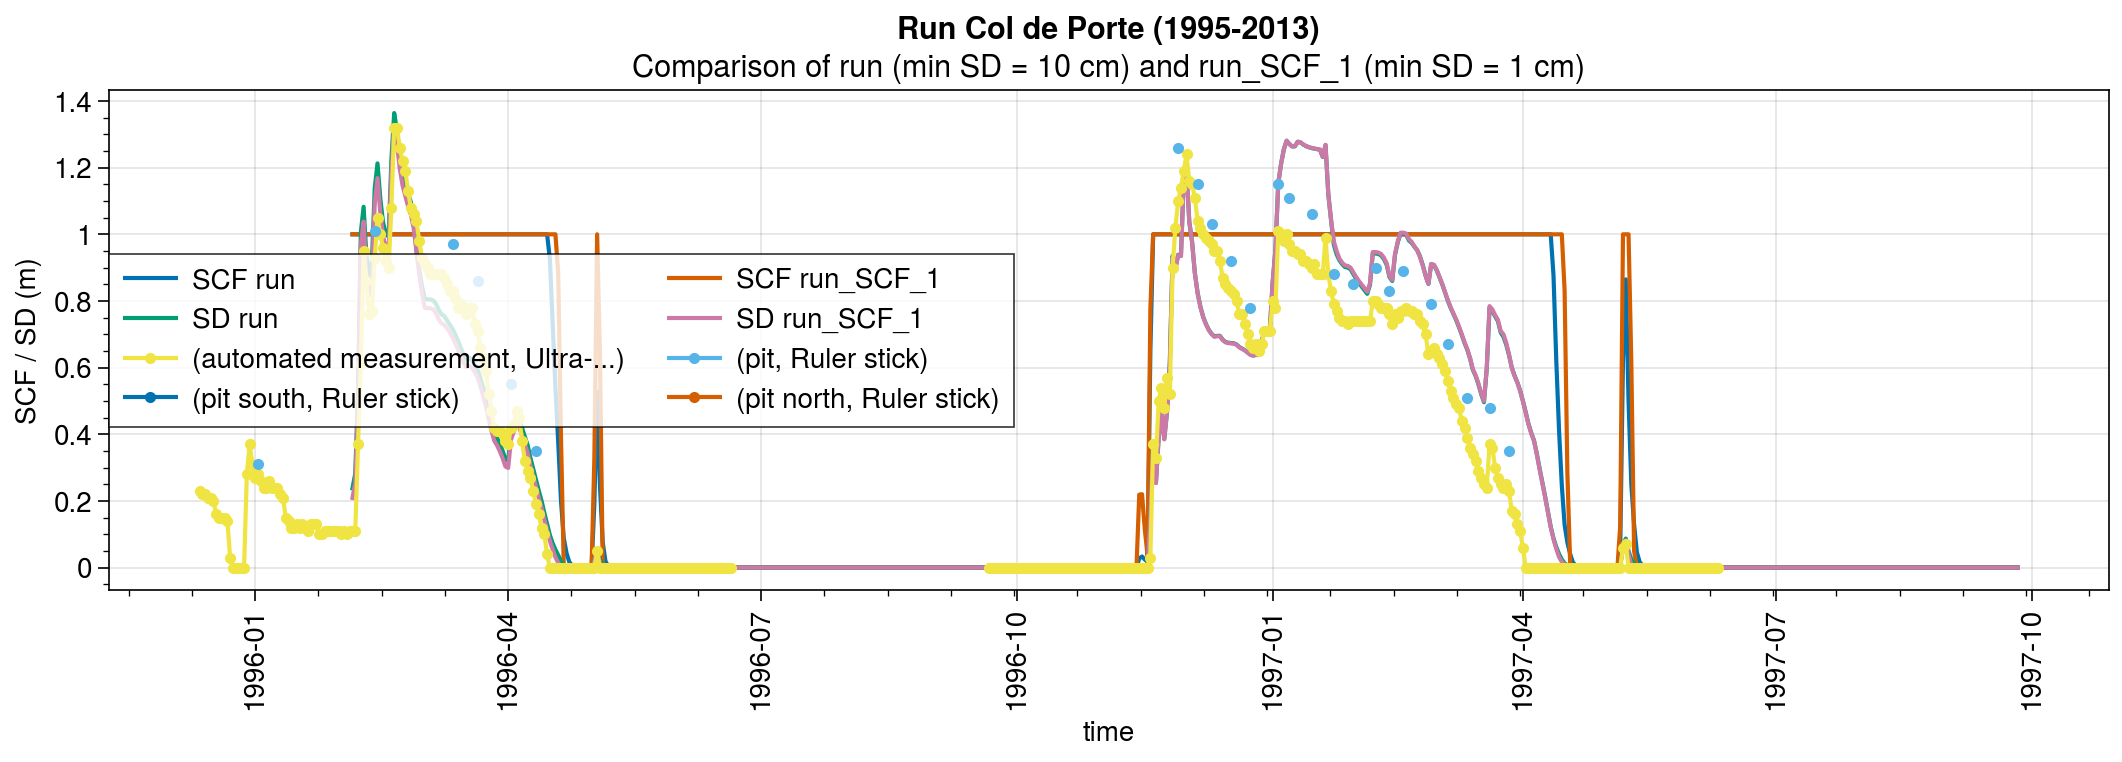

In [262]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=4, axwidth=10)

i_start = 400
i_end = 1000

axs[0].plot(snc_daily[i_start:i_end], label='SCF '+label)
axs[0].plot(snc_daily2[i_start:i_end], label='SCF '+label2)
axs[0].plot(snd_daily[i_start:i_end], label='SD '+label)
axs[0].plot(snd_daily2[i_start:i_end], label='SD '+label2)
axs[0].plot(df.iloc[i_start+360:i_end+360, 0:4], marker='.', labels=[col[15:] for col in df.columns[0:4]])


axs[0].legend(ncols=2)
axs[0].format(
    title='Comparison of run (min SD = 10 cm) and run_SCF_1 (min SD = 1 cm)',
    ylabel='SCF / SD (m)'
)
fig.suptitle('Run Col de Porte (1995-2013)')


Text(0.5, 0.98, 'Col de Porte')

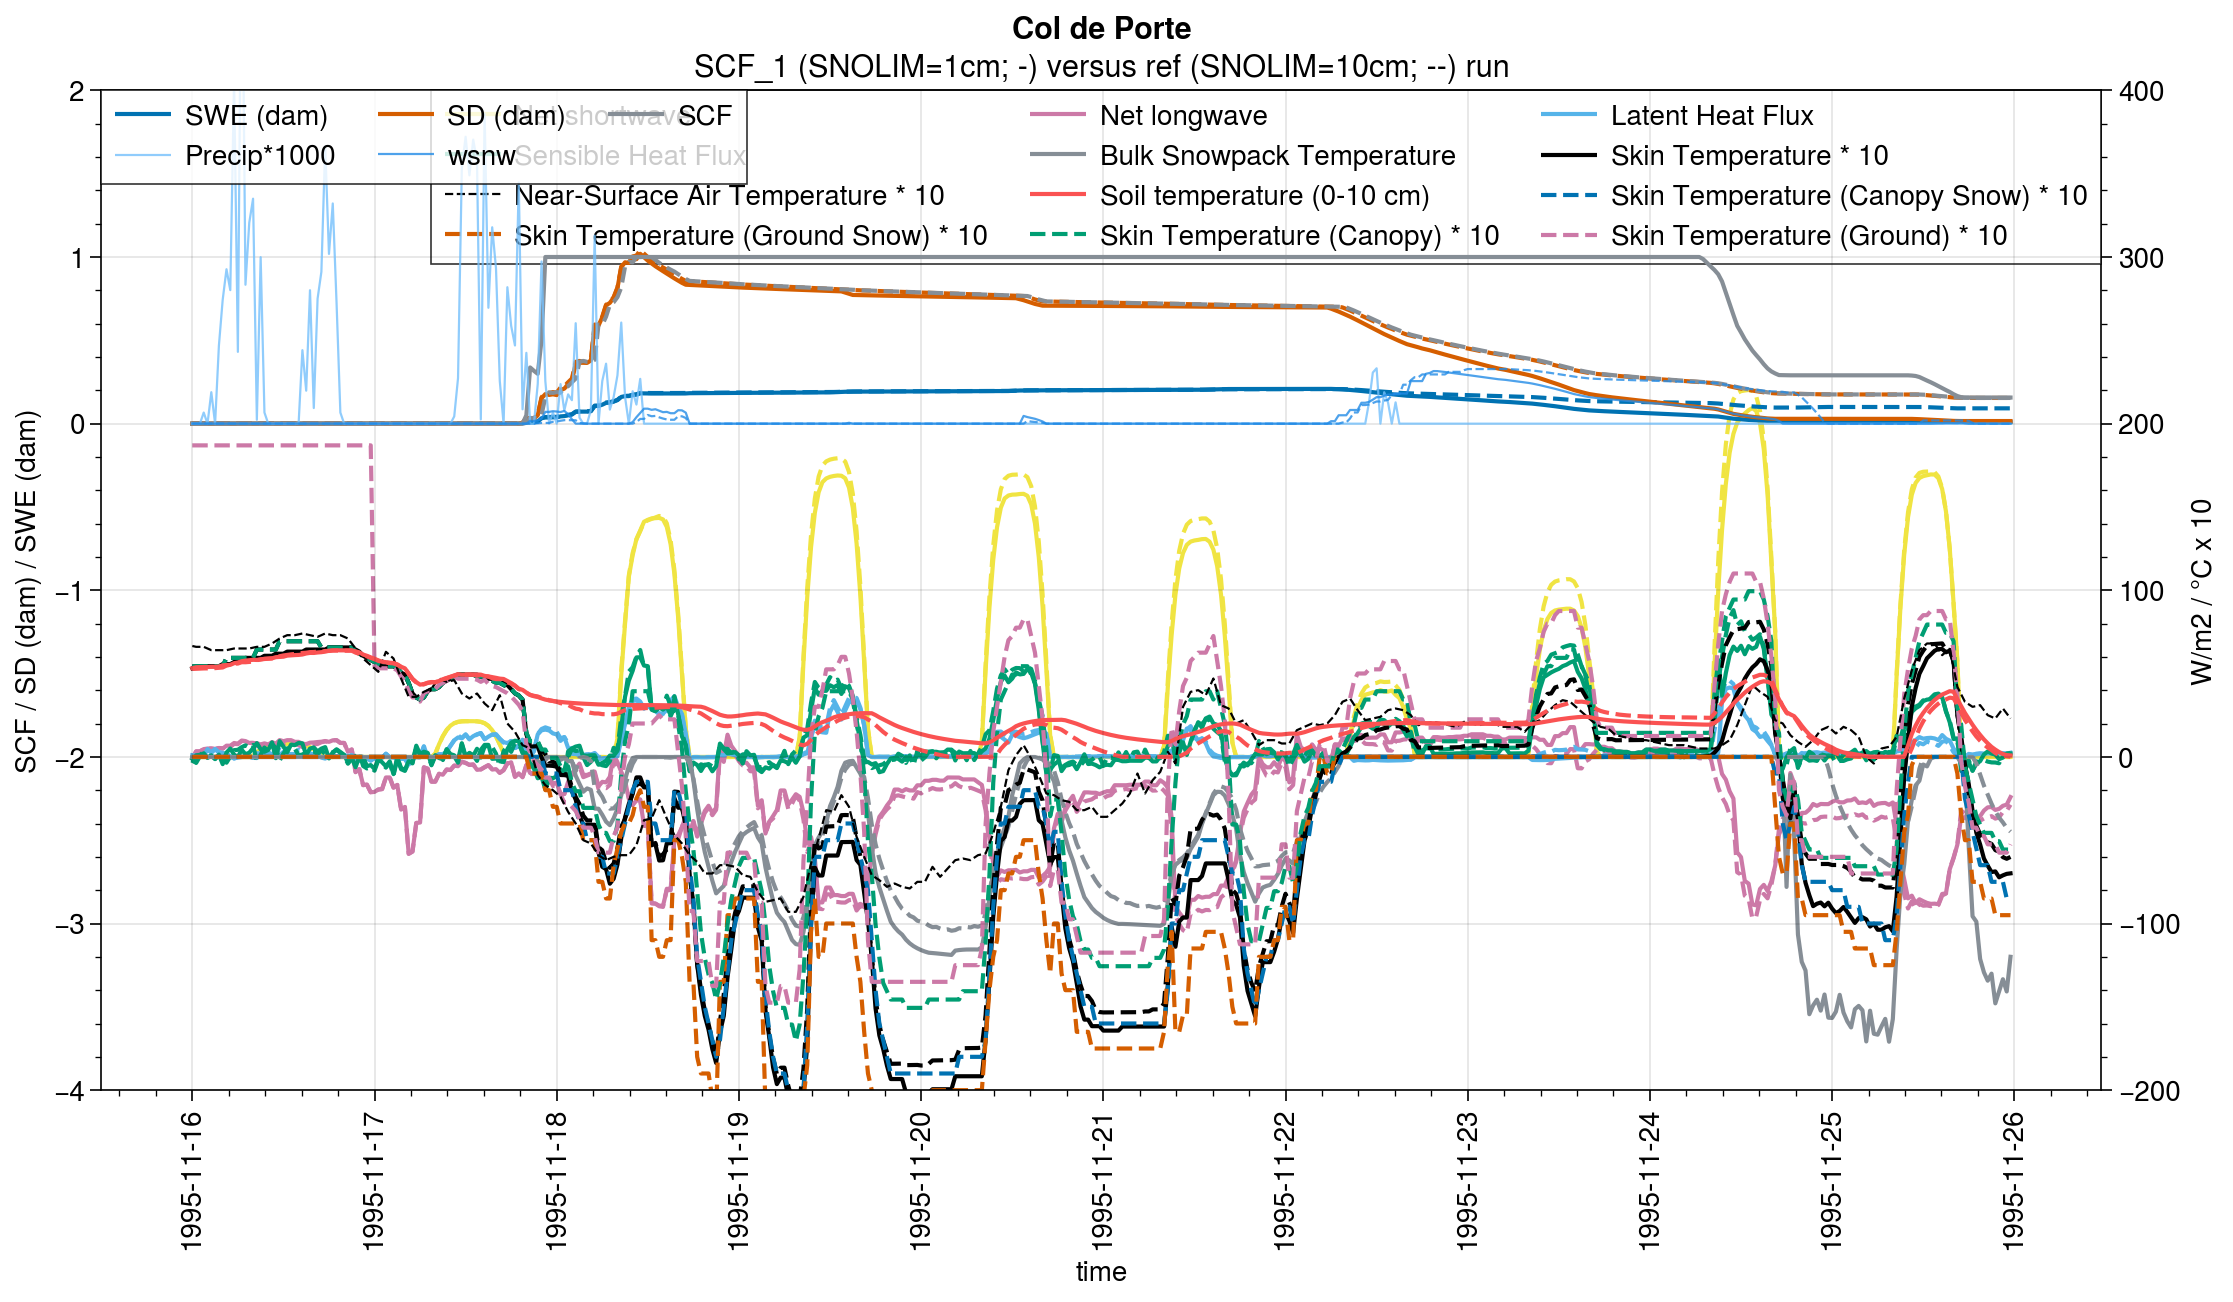

In [266]:
# %matplotlib inline
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = '1995-11-16'
i_end = '1995-11-25'

h0 = axs[0].plot(snw_halfhourly2.sel(time=slice(i_start, i_end))*1e-3*20, label='SWE (dam)', color='C0')
axs[0].plot(snw_halfhourly.sel(time=slice(i_start, i_end))*1e-3*20, label='SWE (dam)', color='C0', ls='--')
h1 = axs[0].plot(snd_halfhourly2.sel(time=slice(i_start, i_end))*10, label='SD (dam)', color='C1')
axs[0].plot(snd_halfhourly.sel(time=slice(i_start, i_end))*10, label='SD (dam)', color='C1', ls='--')
h2 = axs[0].plot(snc_halfhourly2.sel(time=slice(i_start, i_end)), label='SCF', color='gray6')
axs[0].plot(snc_halfhourly.sel(time=slice(i_start, i_end)), label='SCF', color='gray6', ls='--')
h3 = axs[0].plot(pr_halfhourly.sel(time=slice(i_start, i_end))*1e3, label='Precip*1000', color='blue3', alpha=0.8, lw=0.8)
h4 = axs[0].plot(wsnw_halfhourly2.sel(time=slice(i_start, i_end)), label='wsnw', color='blue6', alpha=0.8, lw=0.8)
axs[0].plot(wsnw_halfhourly.sel(time=slice(i_start, i_end)), label='wsnw', color='blue6', alpha=0.8, lw=0.8, ls='--')


ox = axs[0].alty(label='W/m2 / °C x 10')
h5 = ox.plot(rss_halfhourly2.sel(time=slice(i_start, i_end)), label='Net shortwave', color='C4')
ox.plot(rss_halfhourly.sel(time=slice(i_start, i_end)), label='Net shortwave', color='C4', ls='--')
h6 = ox.plot(rls_halfhourly2.sel(time=slice(i_start, i_end)), label='Net longwave', color='C3')
ox.plot(rls_halfhourly.sel(time=slice(i_start, i_end)), label='Net longwave', color='C3', ls='--')
h7 = ox.plot(hfls_halfhourly2.sel(time=slice(i_start, i_end)), label='Latent Heat Flux', color='C5')
ox.plot(hfls_halfhourly.sel(time=slice(i_start, i_end)), label='Latent Heat Flux', color='C5', ls='--')
h8 = ox.plot(hfss_halfhourly2.sel(time=slice(i_start, i_end)), label='Sensible Heat Flux', color='C2')
ox.plot(hfss_halfhourly.sel(time=slice(i_start, i_end)), label='Sensible Heat Flux', color='C2', ls='--')
h9 = ox.plot(tsn_halfhourly2.sel(time=slice(i_start, i_end))*10, label='Bulk Snowpack Temperature', color='gray6')
ox.plot(tsn_halfhourly.sel(time=slice(i_start, i_end))*10, label='Bulk Snowpack Temperature', color='gray6', ls='--')
h10 = ox.plot((ts_halfhourly2.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature * 10', color='k')
ox.plot((ts_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature * 10', color='k', ls='--')

h13 = ox.plot((tscs_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature (Canopy Snow) * 10', ls='--')
h14 = ox.plot((tsgs_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature (Ground Snow) * 10', ls='--')
h15 = ox.plot((tsc_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature (Canopy) * 10', ls='--')
h16 = ox.plot((tsg_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature (Ground) * 10', ls='--')

h11 = ox.plot((tas_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Near-Surface Air Temperature * 10', color='k', ls='--', lw=0.8)

h12 = ox.plot((tsl_halfhourly2.sel(layer=1, time=slice(i_start, i_end))-273.15)*10, label='Soil temperature (0-10 cm)', color='red6')
ox.plot((tsl_halfhourly.sel(layer=1, time=slice(i_start, i_end))-273.15)*10, label='Soil temperature (0-10 cm)', color='red6', ls='--')


ox.legend([h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16], loc='ur')
axs[0].legend([h0, h1, h2, h3, h4], loc='ul')
axs[0].format(title='SCF_1 (SNOLIM=1cm; -) versus ref (SNOLIM=10cm; --) run', ylabel='SCF / SD (dam) / SWE (dam)')
ox.format(ylim=(-200, 400))
axs[0].format(ylim=(-4, 2))

fig.suptitle('Col de Porte')


Text(0.5, 0.98, 'Col de Porte')

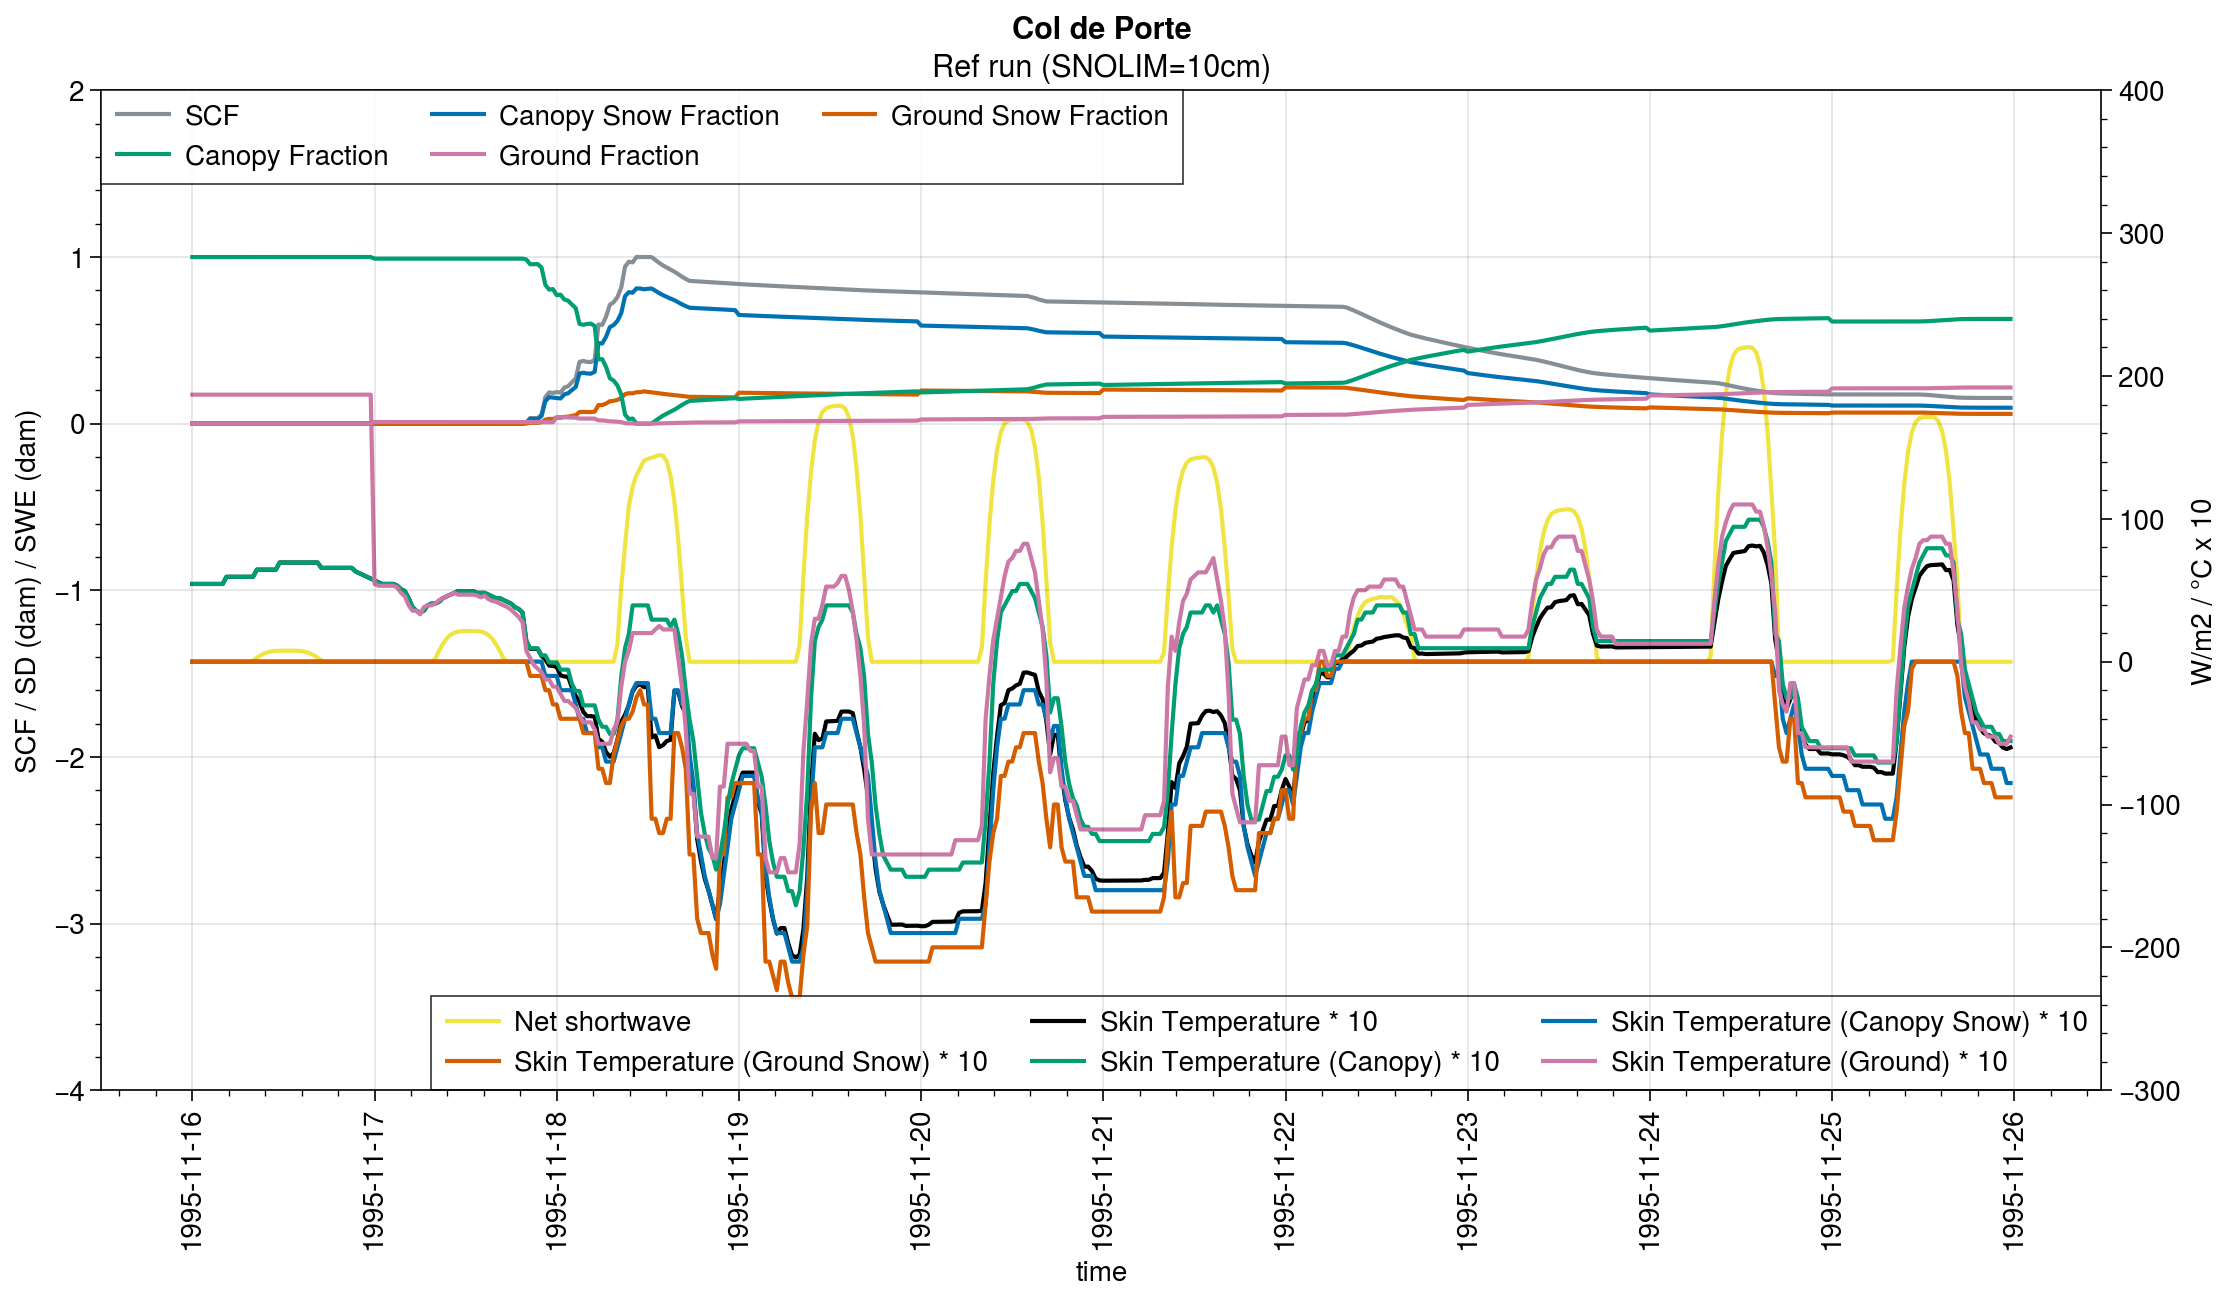

In [297]:
# %matplotlib inline
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = '1995-11-16'
i_end = '1995-11-25'

# h0 = axs[0].plot(snw_halfhourly.sel(time=slice(i_start, i_end))*1e-3*20, label='SWE (dam)', color='C0')
# h1 = axs[0].plot(snd_halfhourly.sel(time=slice(i_start, i_end))*10, label='SD (dam)', color='C1')
h2 = axs[0].plot(snc_halfhourly.sel(time=slice(i_start, i_end)), label='SCF', color='gray6')

ox = axs[0].alty(label='W/m2 / °C x 10')
h3 = ox.plot(rss_halfhourly.sel(time=slice(i_start, i_end)), label='Net shortwave', color='C4')
h4 = ox.plot((ts_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature * 10', color='k')

h5 = ox.plot((tscs_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature (Canopy Snow) * 10')
h6 = ox.plot((tsgs_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature (Ground Snow) * 10')
h7 = ox.plot((tsc_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature (Canopy) * 10')
h8 = ox.plot((tsg_halfhourly.sel(time=slice(i_start, i_end))-273.15)*10, label='Skin Temperature (Ground) * 10')

h9 = axs[0].plot(fcs_halfhourly.sel(time=slice(i_start, i_end)), label='Canopy Snow Fraction')
h10 = axs[0].plot(fgs_halfhourly.sel(time=slice(i_start, i_end)), label='Ground Snow Fraction')
h11 = axs[0].plot(fc_halfhourly.sel(time=slice(i_start, i_end)), label='Canopy Fraction')
h12 = axs[0].plot(fg_halfhourly.sel(time=slice(i_start, i_end)), label='Ground Fraction')

ox.legend([h3, h4, h5, h6, h7, h8], loc='lr')
axs[0].legend([h2, h9, h10, h11, h12], loc='ul')
axs[0].format(title='Ref run (SNOLIM=10cm)', ylabel='SCF / SD (dam) / SWE (dam)')
ox.format(ylim=(-300, 400))
axs[0].format(ylim=(-4, 2))

fig.suptitle('Col de Porte')


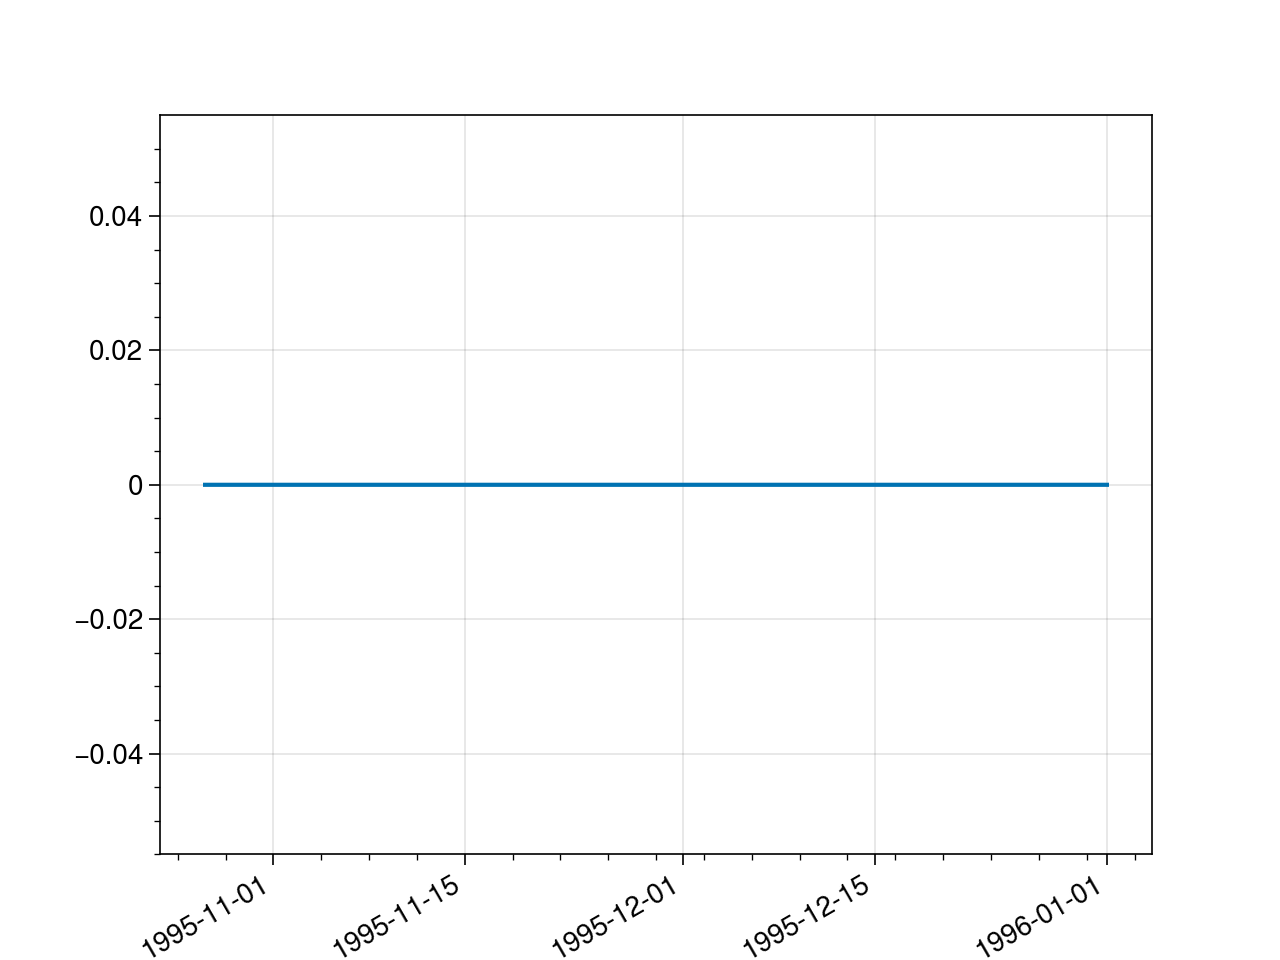

In [296]:
(ts_halfhourly - (fcs_halfhourly*tscs_halfhourly + fgs_halfhourly*tsgs_halfhourly + fc_halfhourly*tsc_halfhourly + fg_halfhourly*tsg_halfhourly) ).plot()

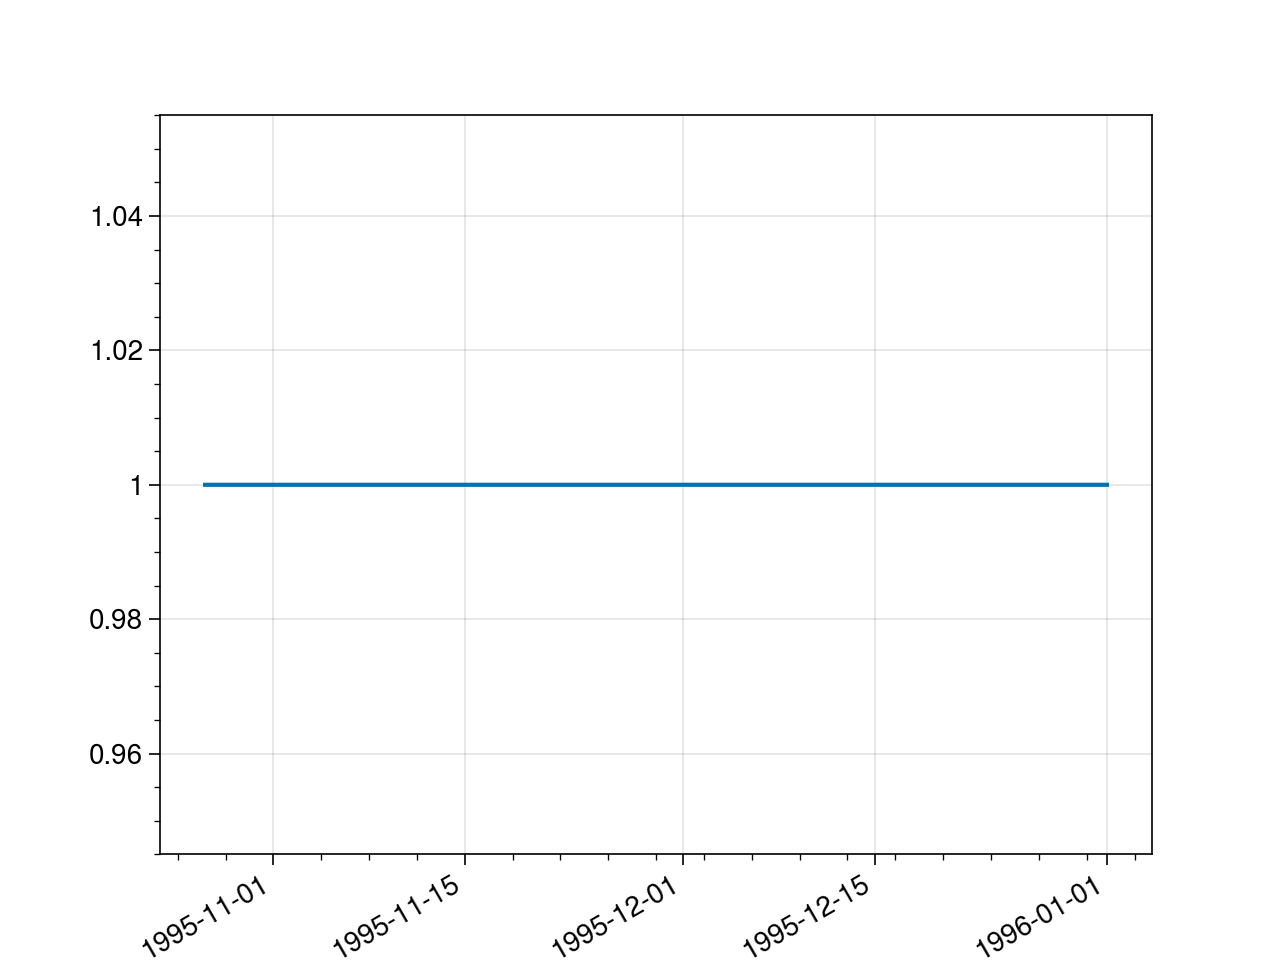

In [294]:
(fcs_halfhourly + fgs_halfhourly + fc_halfhourly + fg_halfhourly).plot()

Text(0.5, 0.98, 'Col de Porte')

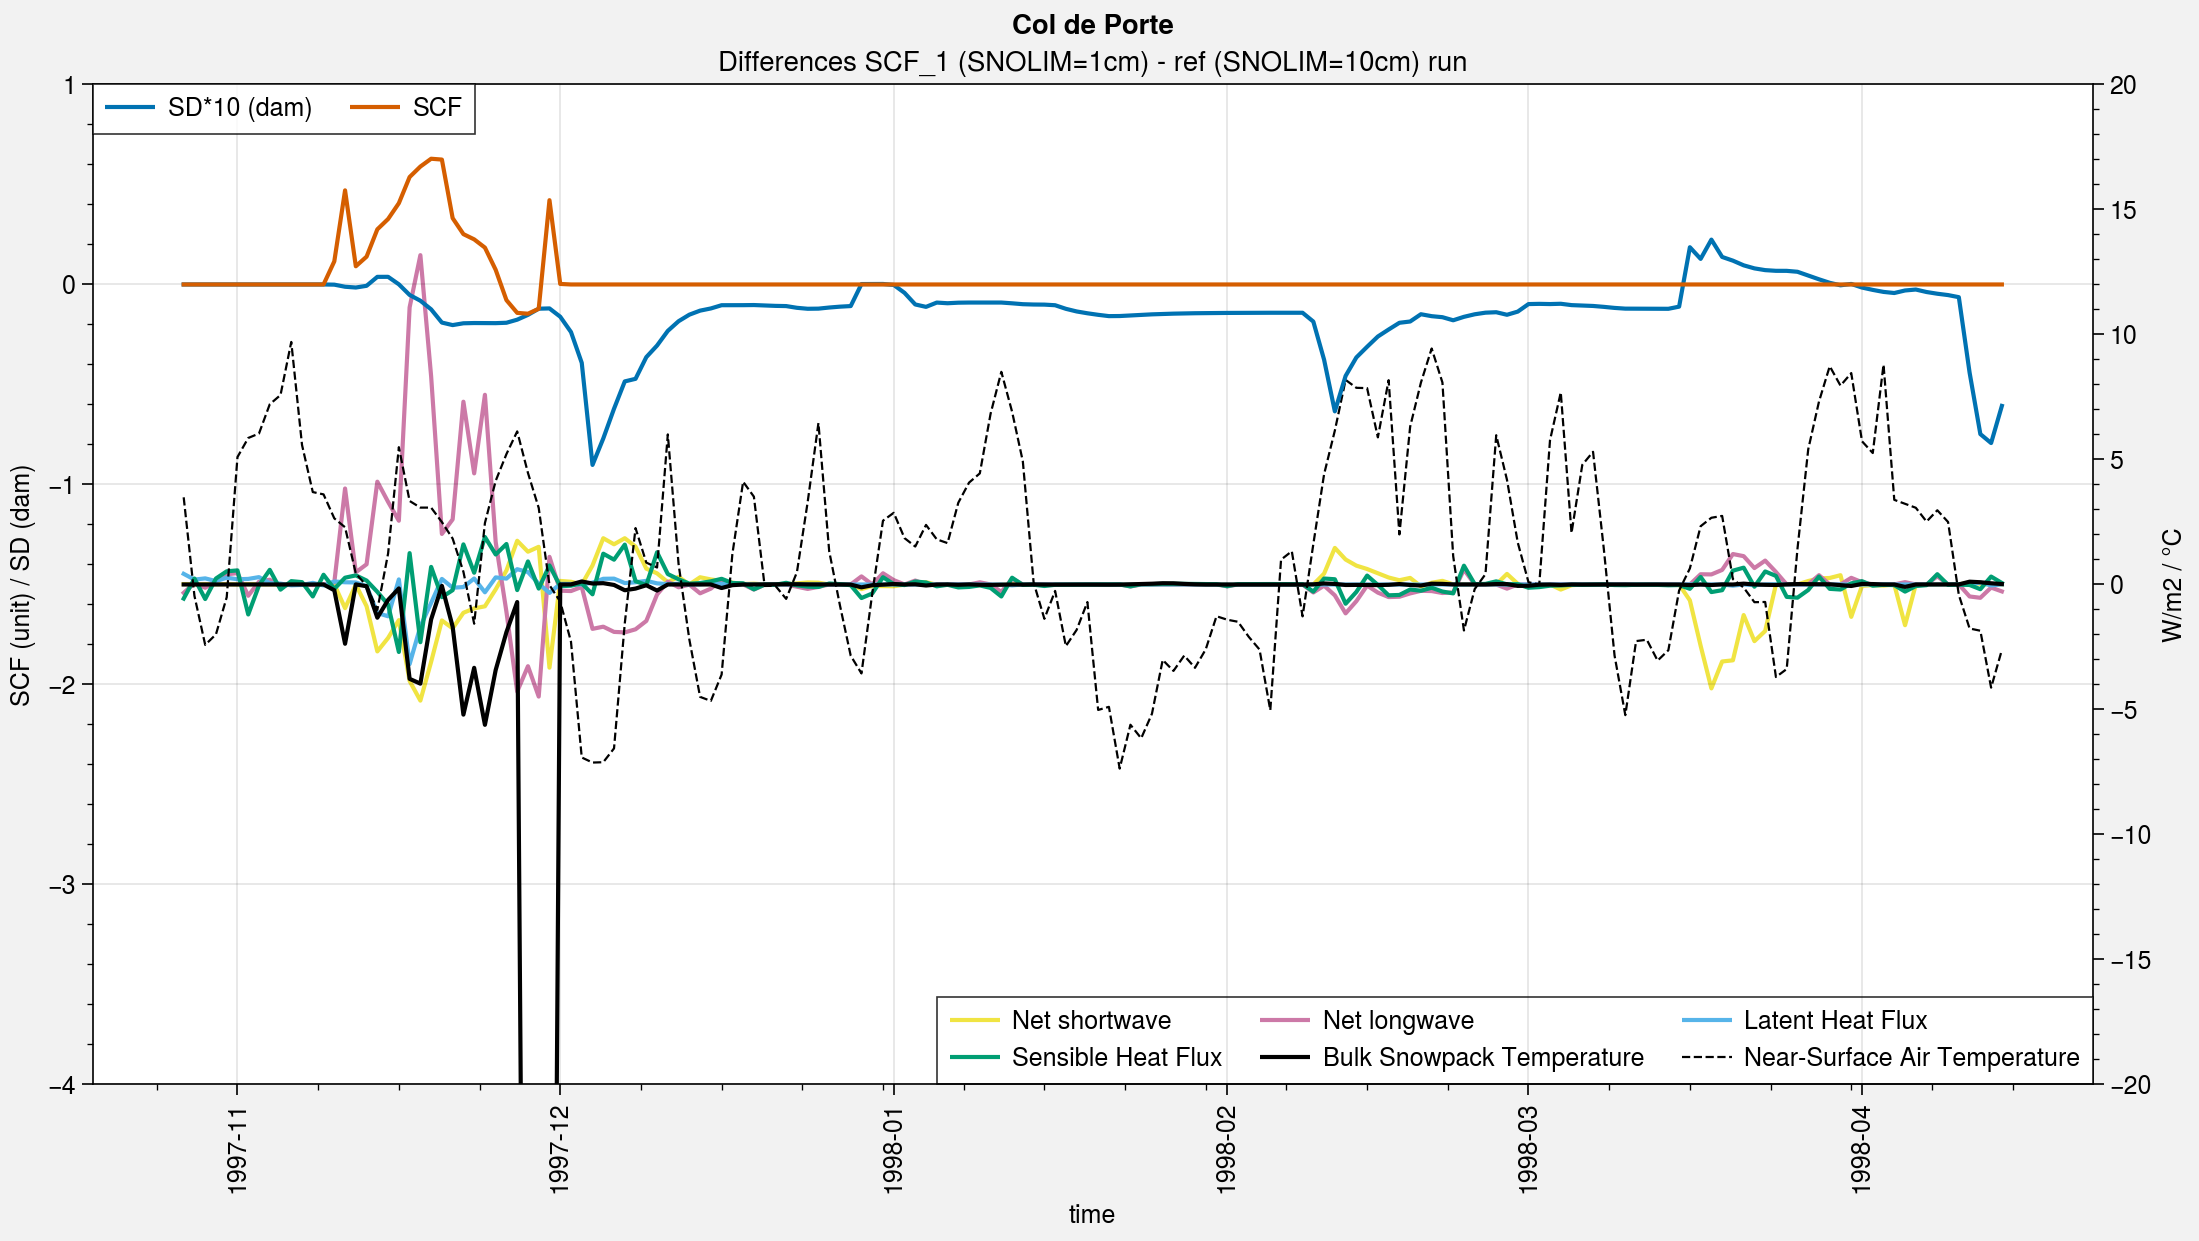

In [143]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = 1030
i_end = 1200

axs[0].plot((snd_daily2[i_start:i_end] - snd_daily[i_start:i_end])*10, label='SD*10 (dam)')
axs[0].plot((snc_daily2[i_start:i_end] - snc_daily[i_start:i_end]), label='SCF')

ox = axs[0].alty(label='W/m2 / °C')
ox.plot(rss_daily2[i_start:i_end] - rss_daily[i_start:i_end], label='Net shortwave', color='C4')
ox.plot(rls_daily2[i_start:i_end] - rls_daily[i_start:i_end], label='Net longwave', color='C3')
ox.plot(hfls_daily2[i_start:i_end] - hfls_daily[i_start:i_end], label='Latent Heat Flux', color='C5')
ox.plot(hfss_daily2[i_start:i_end] - hfss_daily[i_start:i_end], label='Sensible Heat Flux', color='C2')
ox.plot((tsn_daily2[i_start:i_end] - tsn_daily[i_start:i_end]), label='Bulk Snowpack Temperature', color='k')
ox.plot(tas_daily[i_start:i_end]-273.15, label='Near-Surface Air Temperature', color='k', ls='--', lw=0.8)
# ox.plot(ts_daily[i_start:i_end]-273.15, label='Near-Surface Air Temperature', color='gray', ls='--', lw=0.8)



ox.legend(loc='lr')
axs[0].legend(loc='ul')
axs[0].format(title='Differences SCF_1 (SNOLIM=1cm) - ref (SNOLIM=10cm) run', ylabel='SCF (unit) / SD (dam)')
ox.format(ylim=(-20, 20))
axs[0].format(ylim=(-4, 1))

fig.suptitle('Col de Porte')


Text(0.5, 0.98, 'Col de Porte')

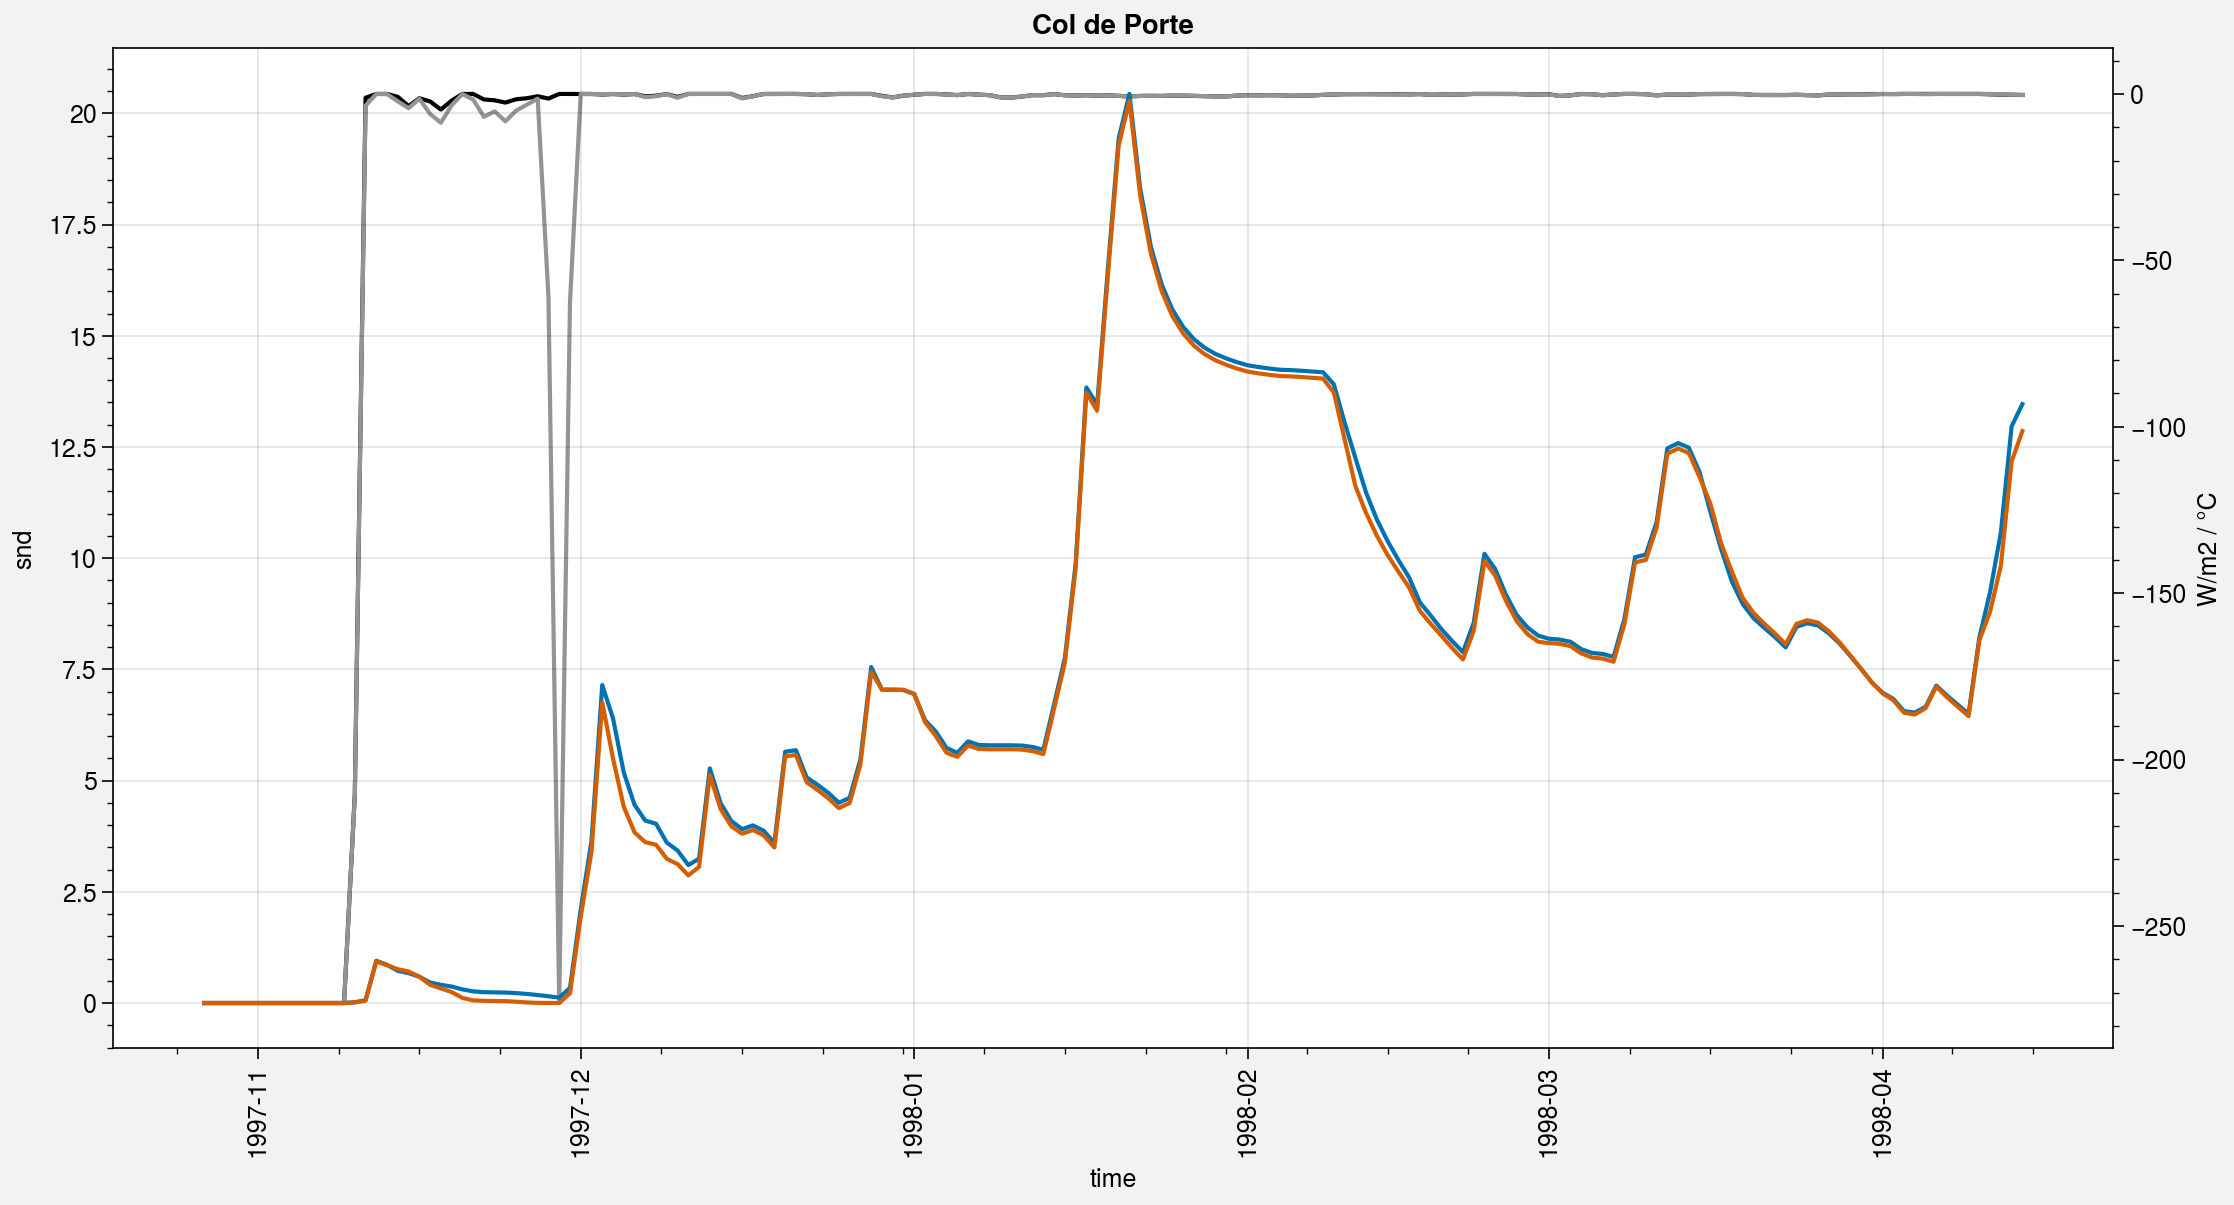

In [144]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = 1030
i_end = 1200

axs[0].plot(snd_daily[i_start:i_end]*10, label='SD*10 (dam)')
axs[0].plot(snd_daily2[i_start:i_end]*10, label='SD*10 (dam)')

# axs[0].plot(snw_daily[i_start:i_end]*10, label='SD*10 (dam)')
# axs[0].plot(snw_daily2[i_start:i_end]*10, label='SD*10 (dam)')

ox = axs[0].alty(label='W/m2 / °C')
ox.plot(tsn_daily[i_start:i_end]-273.15, label='Bulk Snowpack Temperature', color='k')
ox.plot(tsn_daily2[i_start:i_end]-273.15, label='Bulk Snowpack Temperature', color='gray')

# ox.legend(loc='lr')
# axs[0].legend(loc='ul')
# axs[0].format(title='Differences SCF_1 (SNOLIM=1cm) - ref (SNOLIM=10cm) run', ylabel='SCF (unit) / SD (dam)')
# ox.format(ylim=(-20, 20))
# axs[0].format(ylim=(-4, 1))

fig.suptitle('Col de Porte')


Text(0.5, 0.98, 'Col de Porte')

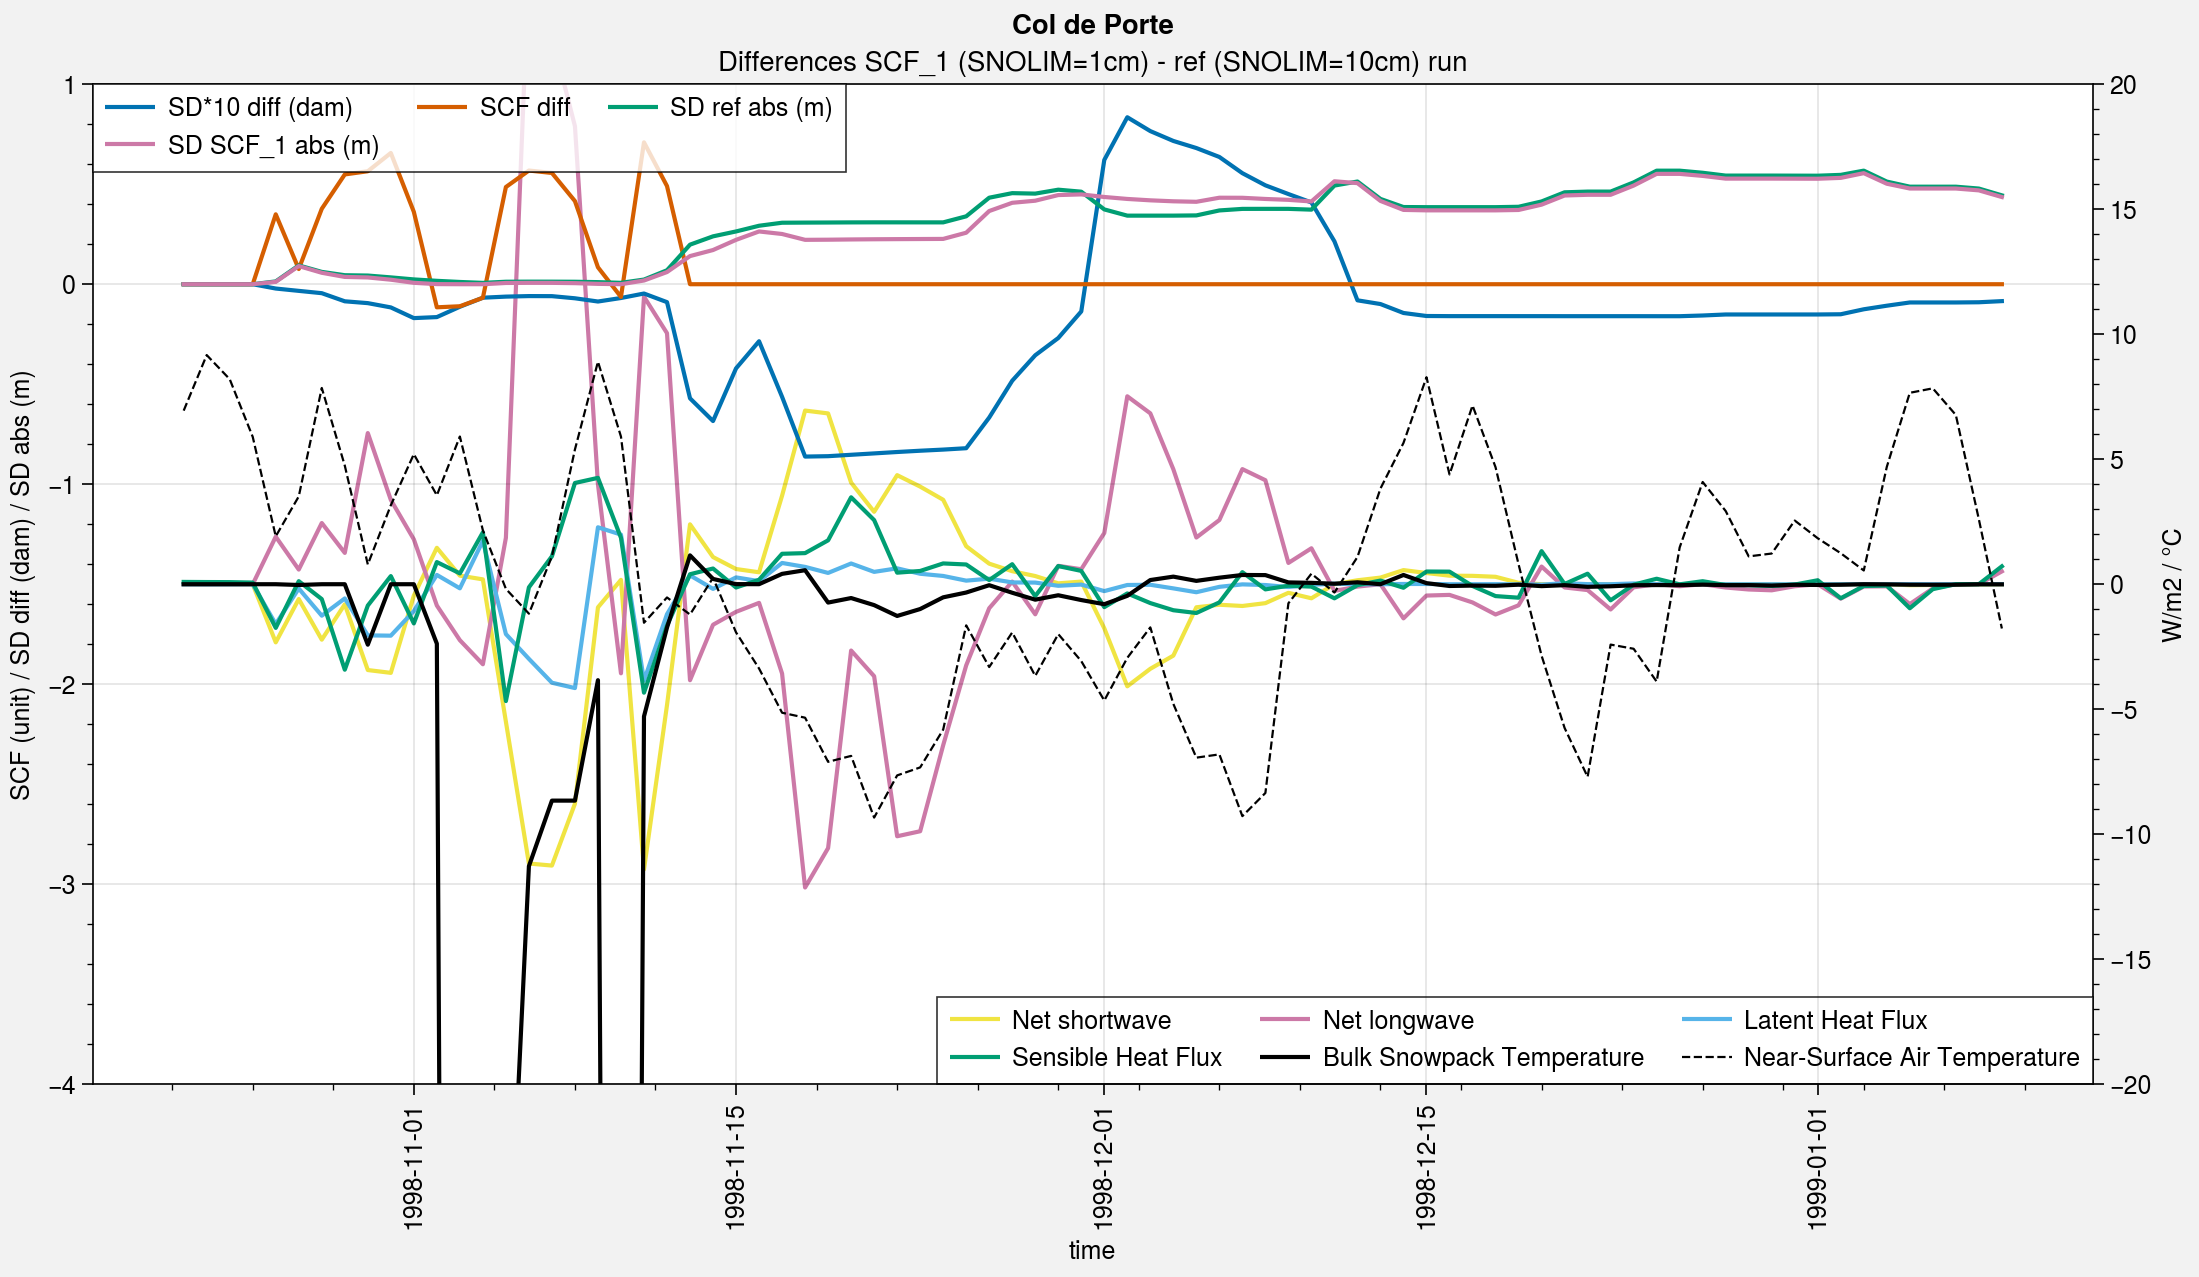

In [157]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = 1390
i_end = 1470

axs[0].plot((snd_daily2[i_start:i_end] - snd_daily[i_start:i_end])*10, label='SD*10 diff (dam)')
axs[0].plot((snc_daily2[i_start:i_end] - snc_daily[i_start:i_end]), label='SCF diff')

axs[0].plot(snd_daily[i_start:i_end], label='SD ref abs (m)')
axs[0].plot(snd_daily2[i_start:i_end], label='SD SCF_1 abs (m)')

ox = axs[0].alty(label='W/m2 / °C')
ox.plot(rss_daily2[i_start:i_end] - rss_daily[i_start:i_end], label='Net shortwave', color='C4')
ox.plot(rls_daily2[i_start:i_end] - rls_daily[i_start:i_end], label='Net longwave', color='C3')
ox.plot(hfls_daily2[i_start:i_end] - hfls_daily[i_start:i_end], label='Latent Heat Flux', color='C5')
ox.plot(hfss_daily2[i_start:i_end] - hfss_daily[i_start:i_end], label='Sensible Heat Flux', color='C2')
ox.plot((tsn_daily2[i_start:i_end] - tsn_daily[i_start:i_end]), label='Bulk Snowpack Temperature', color='k')
ox.plot(tas_daily[i_start:i_end]-273.15, label='Near-Surface Air Temperature', color='k', ls='--', lw=0.8)
# ox.plot(ts_daily[i_start:i_end]-273.15, label='Near-Surface Air Temperature', color='gray', ls='--', lw=0.8)



ox.legend(loc='lr')
axs[0].legend(loc='ul')
axs[0].format(title='Differences SCF_1 (SNOLIM=1cm) - ref (SNOLIM=10cm) run', ylabel='SCF (unit) / SD diff (dam) / SD abs (m)')
ox.format(ylim=(-20, 20))
axs[0].format(ylim=(-4, 1))

fig.suptitle('Col de Porte')


Text(0.5, 0.98, 'Col de Porte')

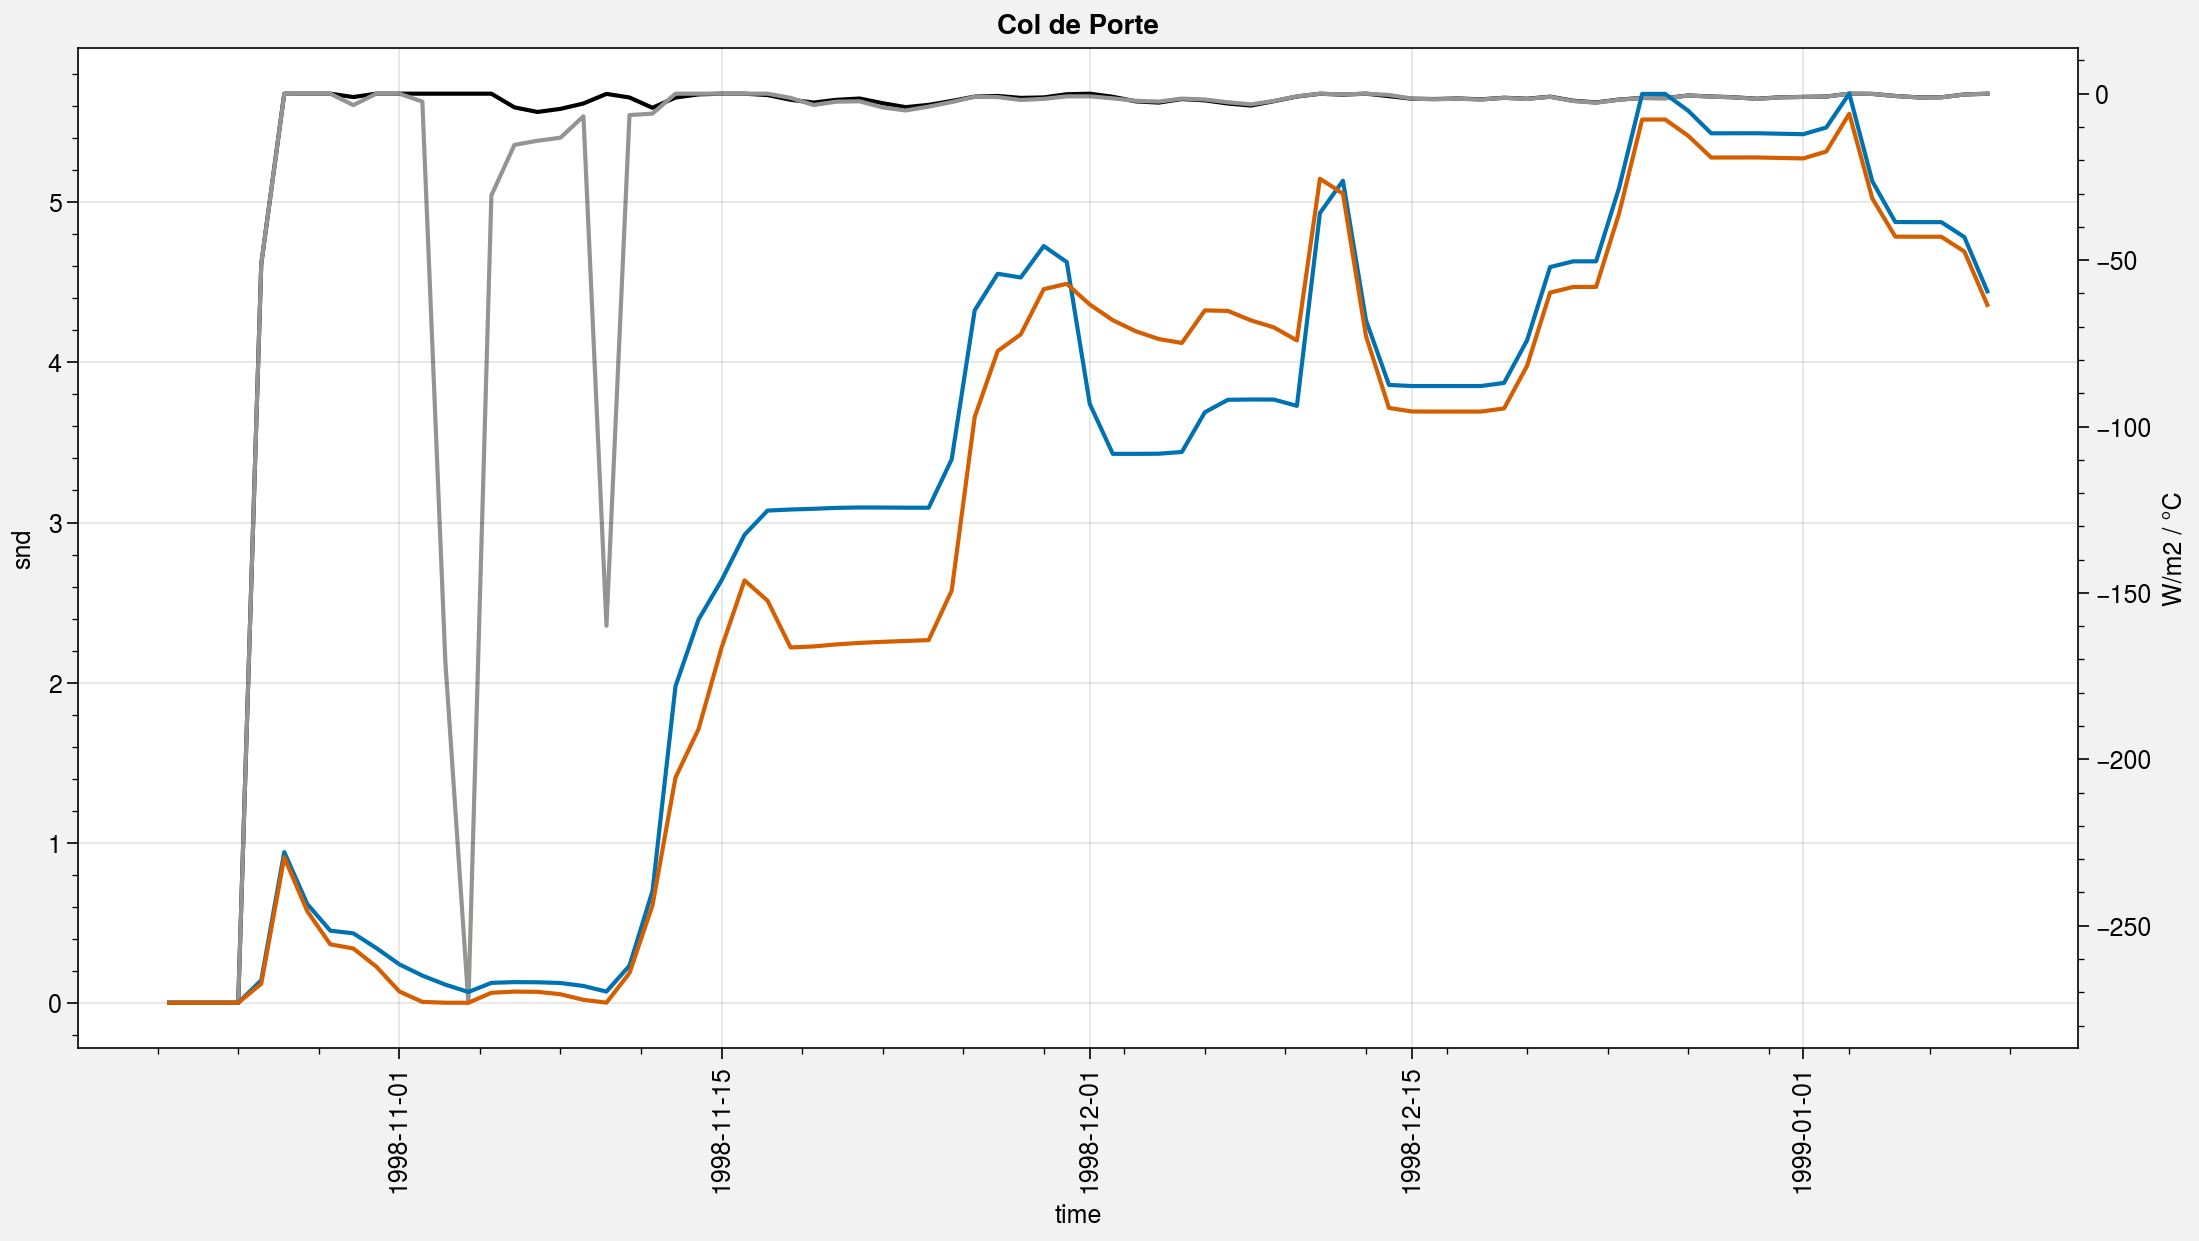

In [146]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = 1390
i_end = 1470

axs[0].plot(snd_daily[i_start:i_end]*10, label='SD*10 (dam)')
axs[0].plot(snd_daily2[i_start:i_end]*10, label='SD*10 (dam)')

# axs[0].plot(snw_daily[i_start:i_end]*10, label='SD*10 (dam)')
# axs[0].plot(snw_daily2[i_start:i_end]*10, label='SD*10 (dam)')

ox = axs[0].alty(label='W/m2 / °C')
ox.plot(tsn_daily[i_start:i_end]-273.15, label='Bulk Snowpack Temperature', color='k')
ox.plot(tsn_daily2[i_start:i_end]-273.15, label='Bulk Snowpack Temperature', color='gray')

# ox.legend(loc='lr')
# axs[0].legend(loc='ul')
# axs[0].format(title='Differences SCF_1 (SNOLIM=1cm) - ref (SNOLIM=10cm) run', ylabel='SCF (unit) / SD (dam)')
# ox.format(ylim=(-20, 20))
# axs[0].format(ylim=(-4, 1))

fig.suptitle('Col de Porte')


Text(0.5, 0.98, 'Col de Porte')

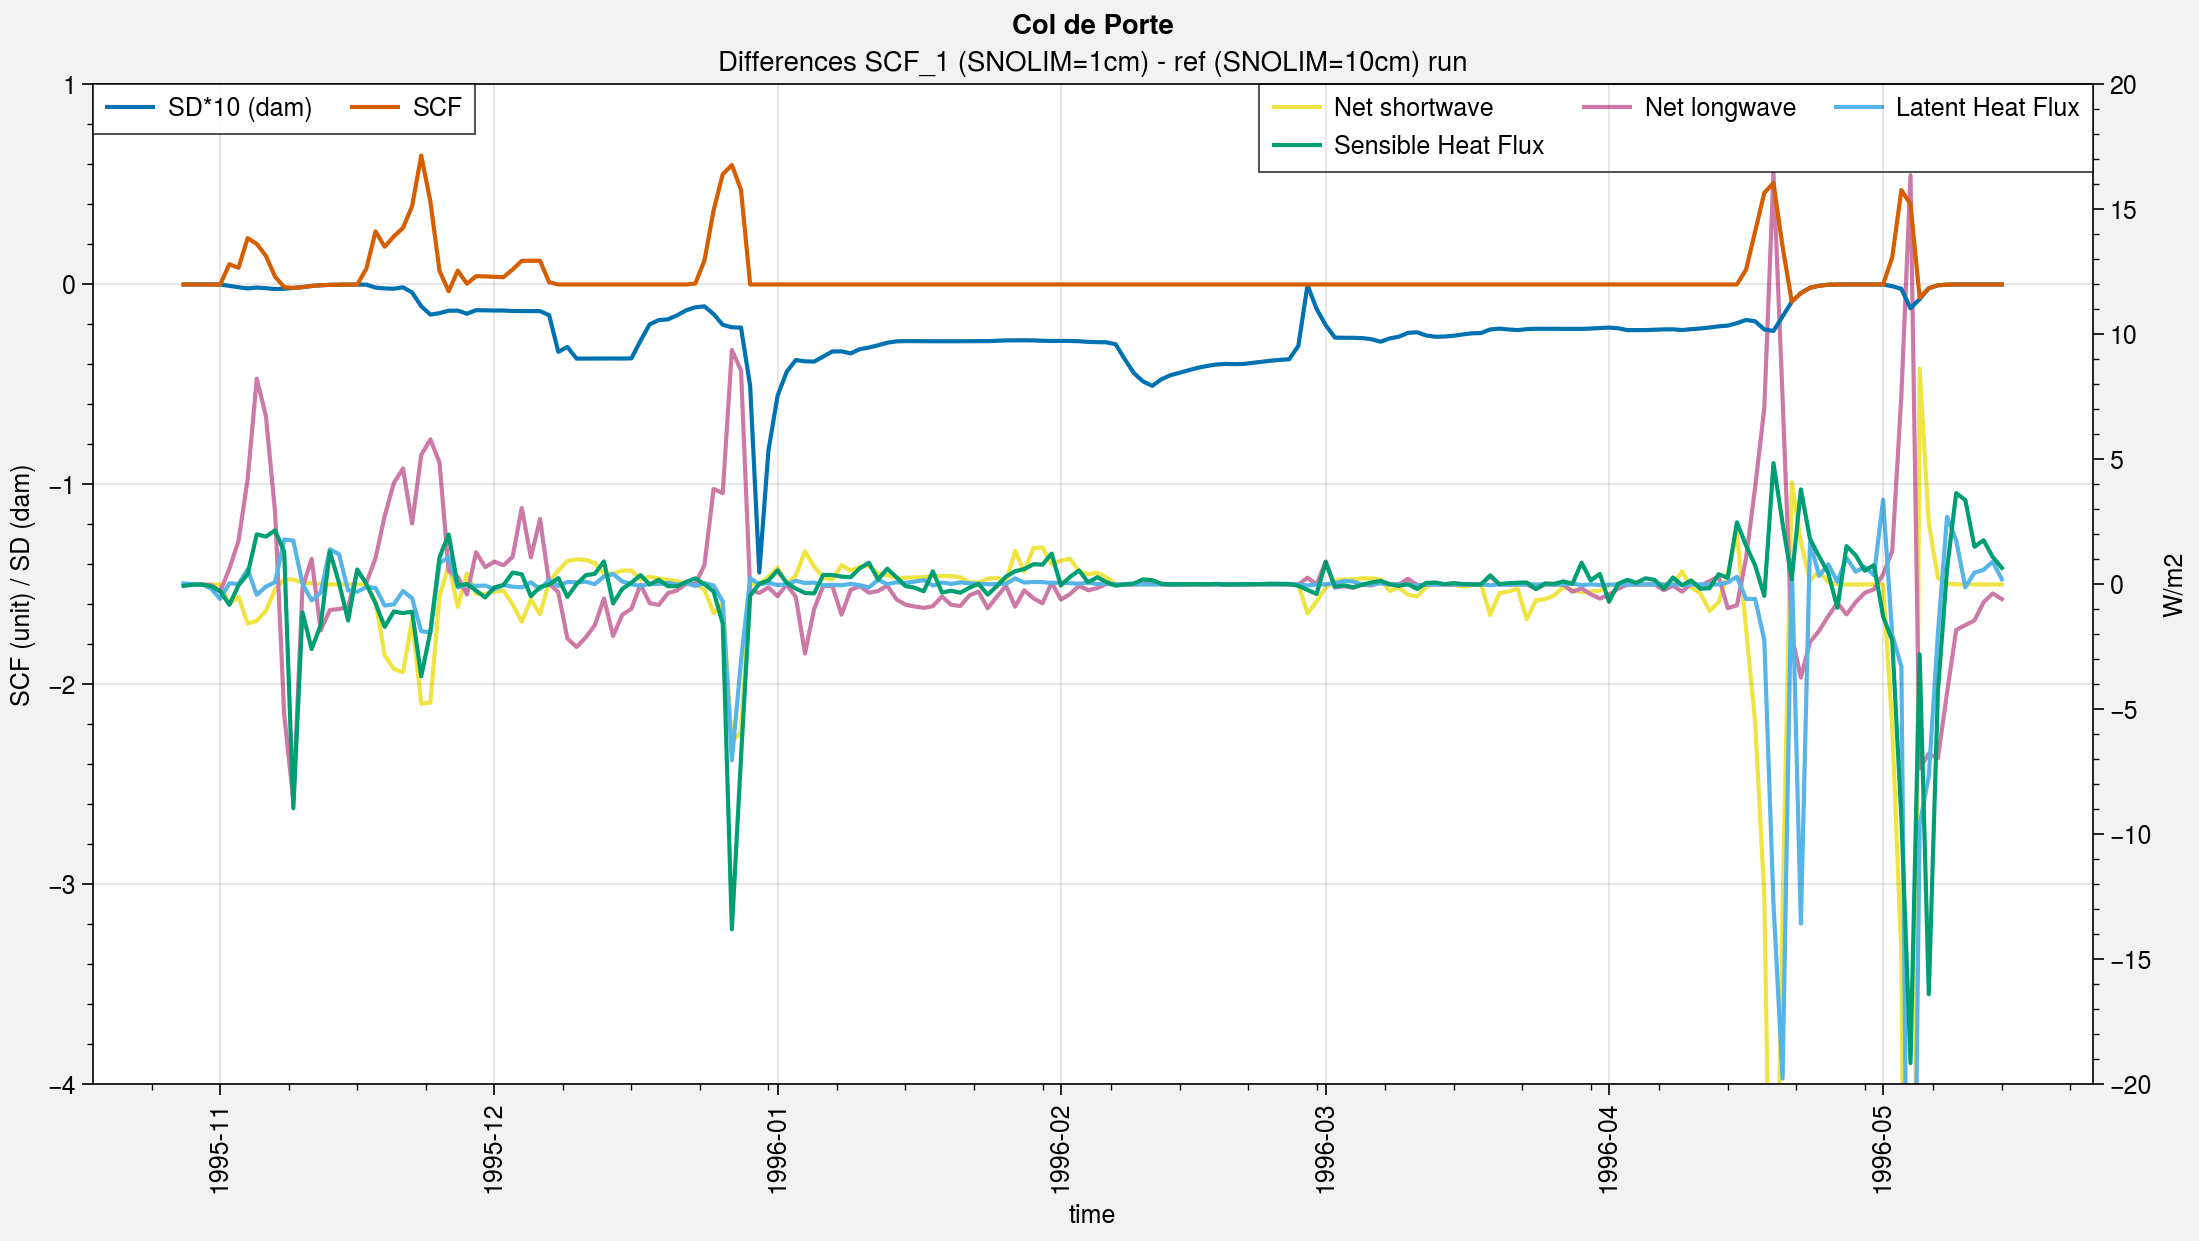

In [87]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = 300
i_end = 500

axs[0].plot((snd_daily2[i_start:i_end] - snd_daily[i_start:i_end])*10, label='SD*10 (dam)')
axs[0].plot((snc_daily2[i_start:i_end] - snc_daily[i_start:i_end]), label='SCF')

ox = axs[0].alty(label='W/m2')
ox.plot(rss_daily2[i_start:i_end] - rss_daily[i_start:i_end], label='Net shortwave', color='C4')
ox.plot(rls_daily2[i_start:i_end] - rls_daily[i_start:i_end], label='Net longwave', color='C3')
ox.plot(hfls_daily2[i_start:i_end] - hfls_daily[i_start:i_end], label='Latent Heat Flux', color='C5')
ox.plot(hfss_daily2[i_start:i_end] - hfss_daily[i_start:i_end], label='Sensible Heat Flux', color='C2')


ox.legend(loc='ur')
axs[0].legend(loc='ul')
axs[0].format(title='Differences SCF_1 (SNOLIM=1cm) - ref (SNOLIM=10cm) run', ylabel='SCF (unit) / SD (dam)')
ox.format(ylim=(-20, 20))
axs[0].format(ylim=(-4, 1))

fig.suptitle('Col de Porte')


Text(0.5, 0.98, 'Col de Porte')

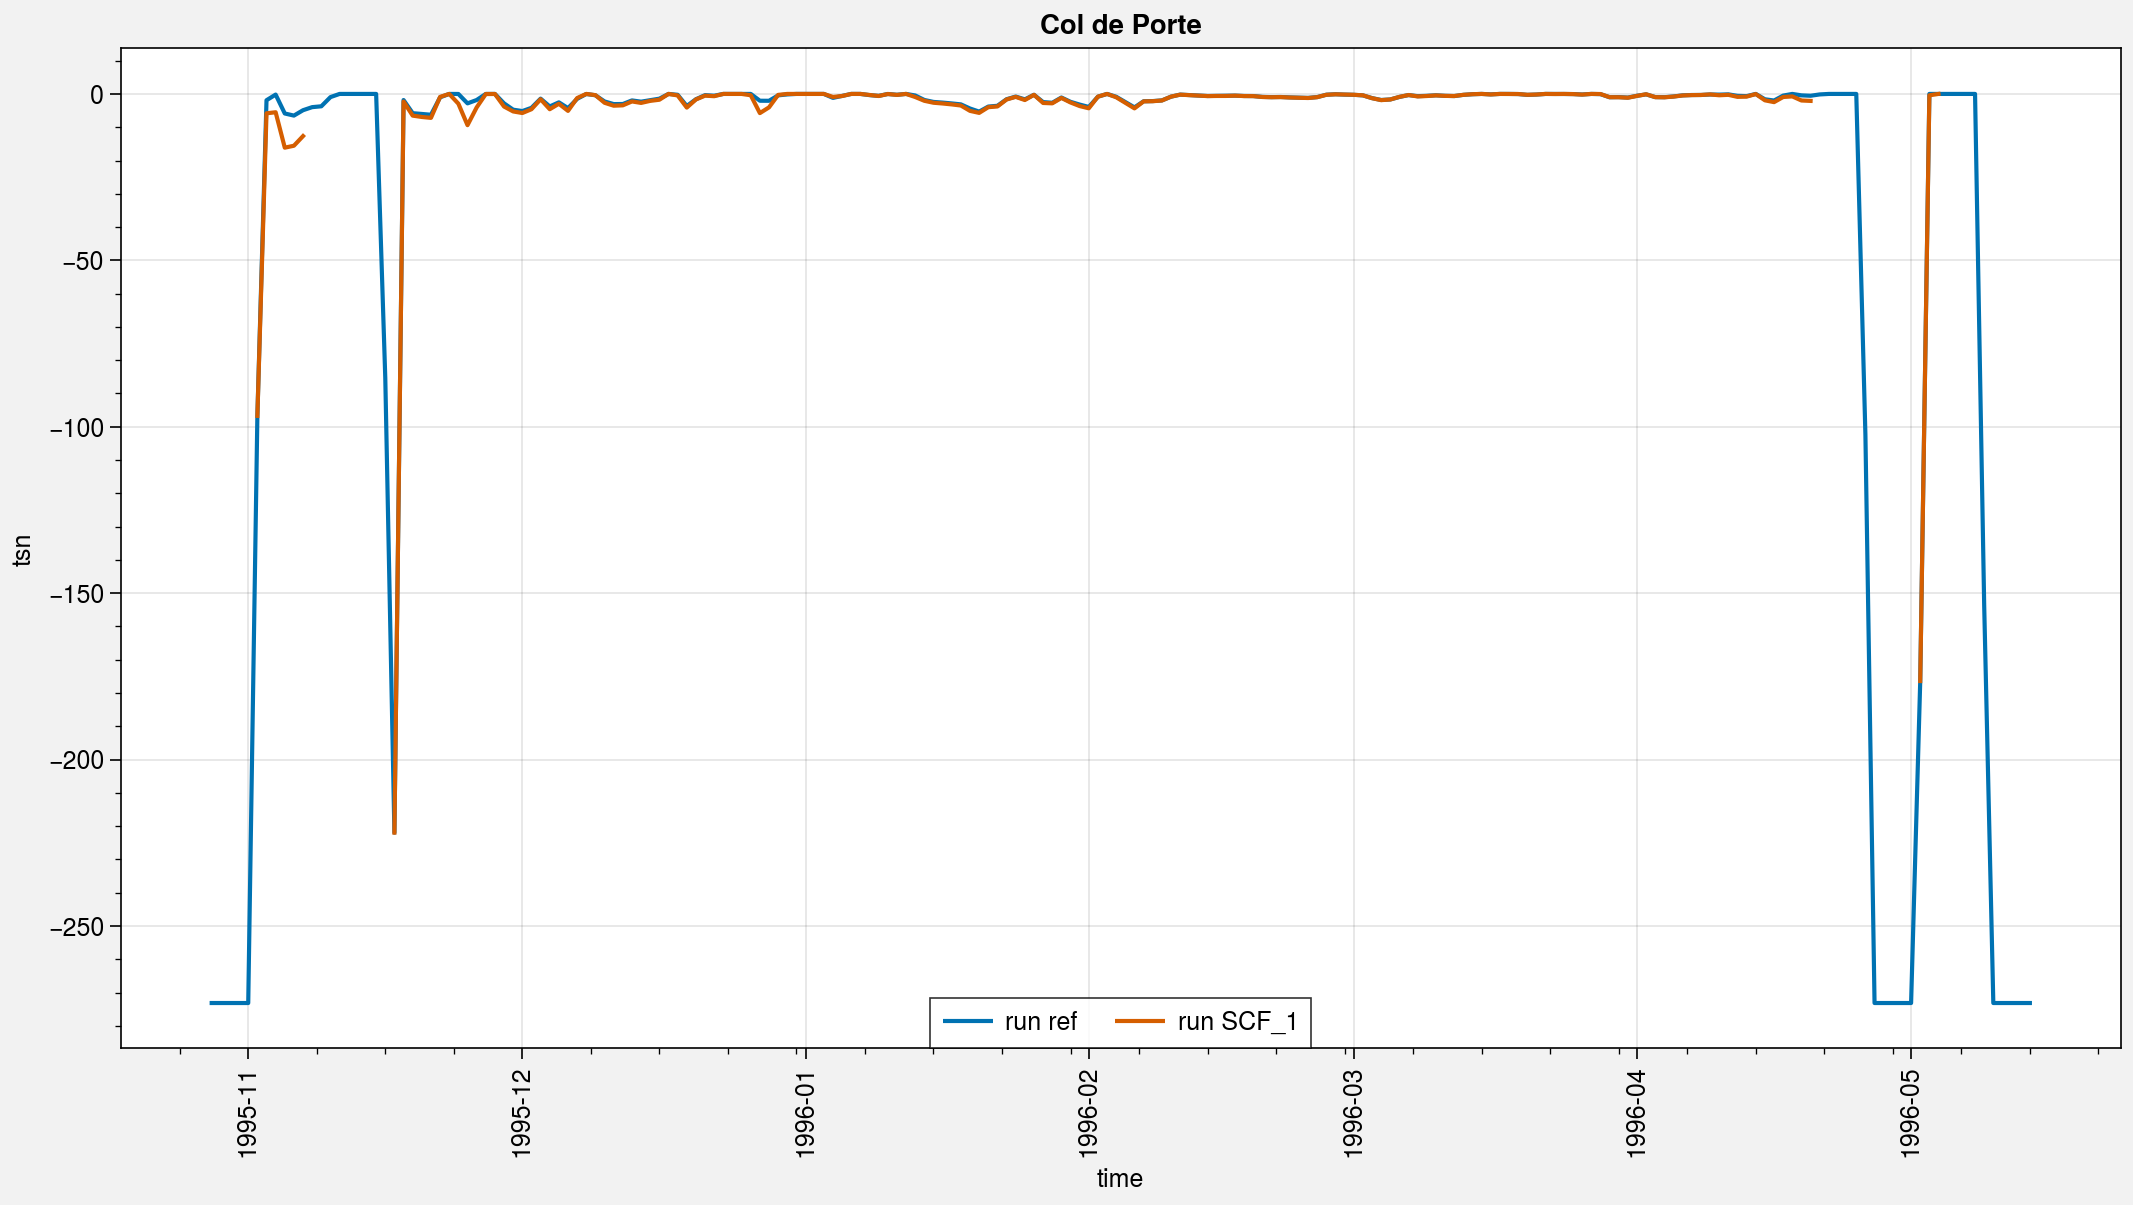

In [168]:
fig, axs = plot.subplots(ncols=1, nrows=1, aspect=2, axwidth=10)

i_start = 300
i_end = 500

# ox.plot(rss_daily2[i_start:i_end] - rss_daily[i_start:i_end], label='Net shortwave', color='C4')
axs[0].plot(tsn_daily[i_start:i_end]-273.15, label='run ref')
axs[0].plot(tsn_daily2[i_start:i_end].where(snd_daily2>0.0001)-273.15, label='run SCF_1')
# axs[0].plot(snd_daily2[i_start:i_end], label='run SCF_1')
# ox.plot(hfls_daily2[i_start:i_end] - hfls_daily[i_start:i_end], label='Latent Heat Flux', color='C5')
# ox.plot(hfss_daily2[i_start:i_end] - hfss_daily[i_start:i_end], label='Sensible Heat Flux', color='C2')

axs[0].legend()
fig.suptitle('Col de Porte')


Text(0.5, 0.98, 'Run Col de Porte (1995-2013)')

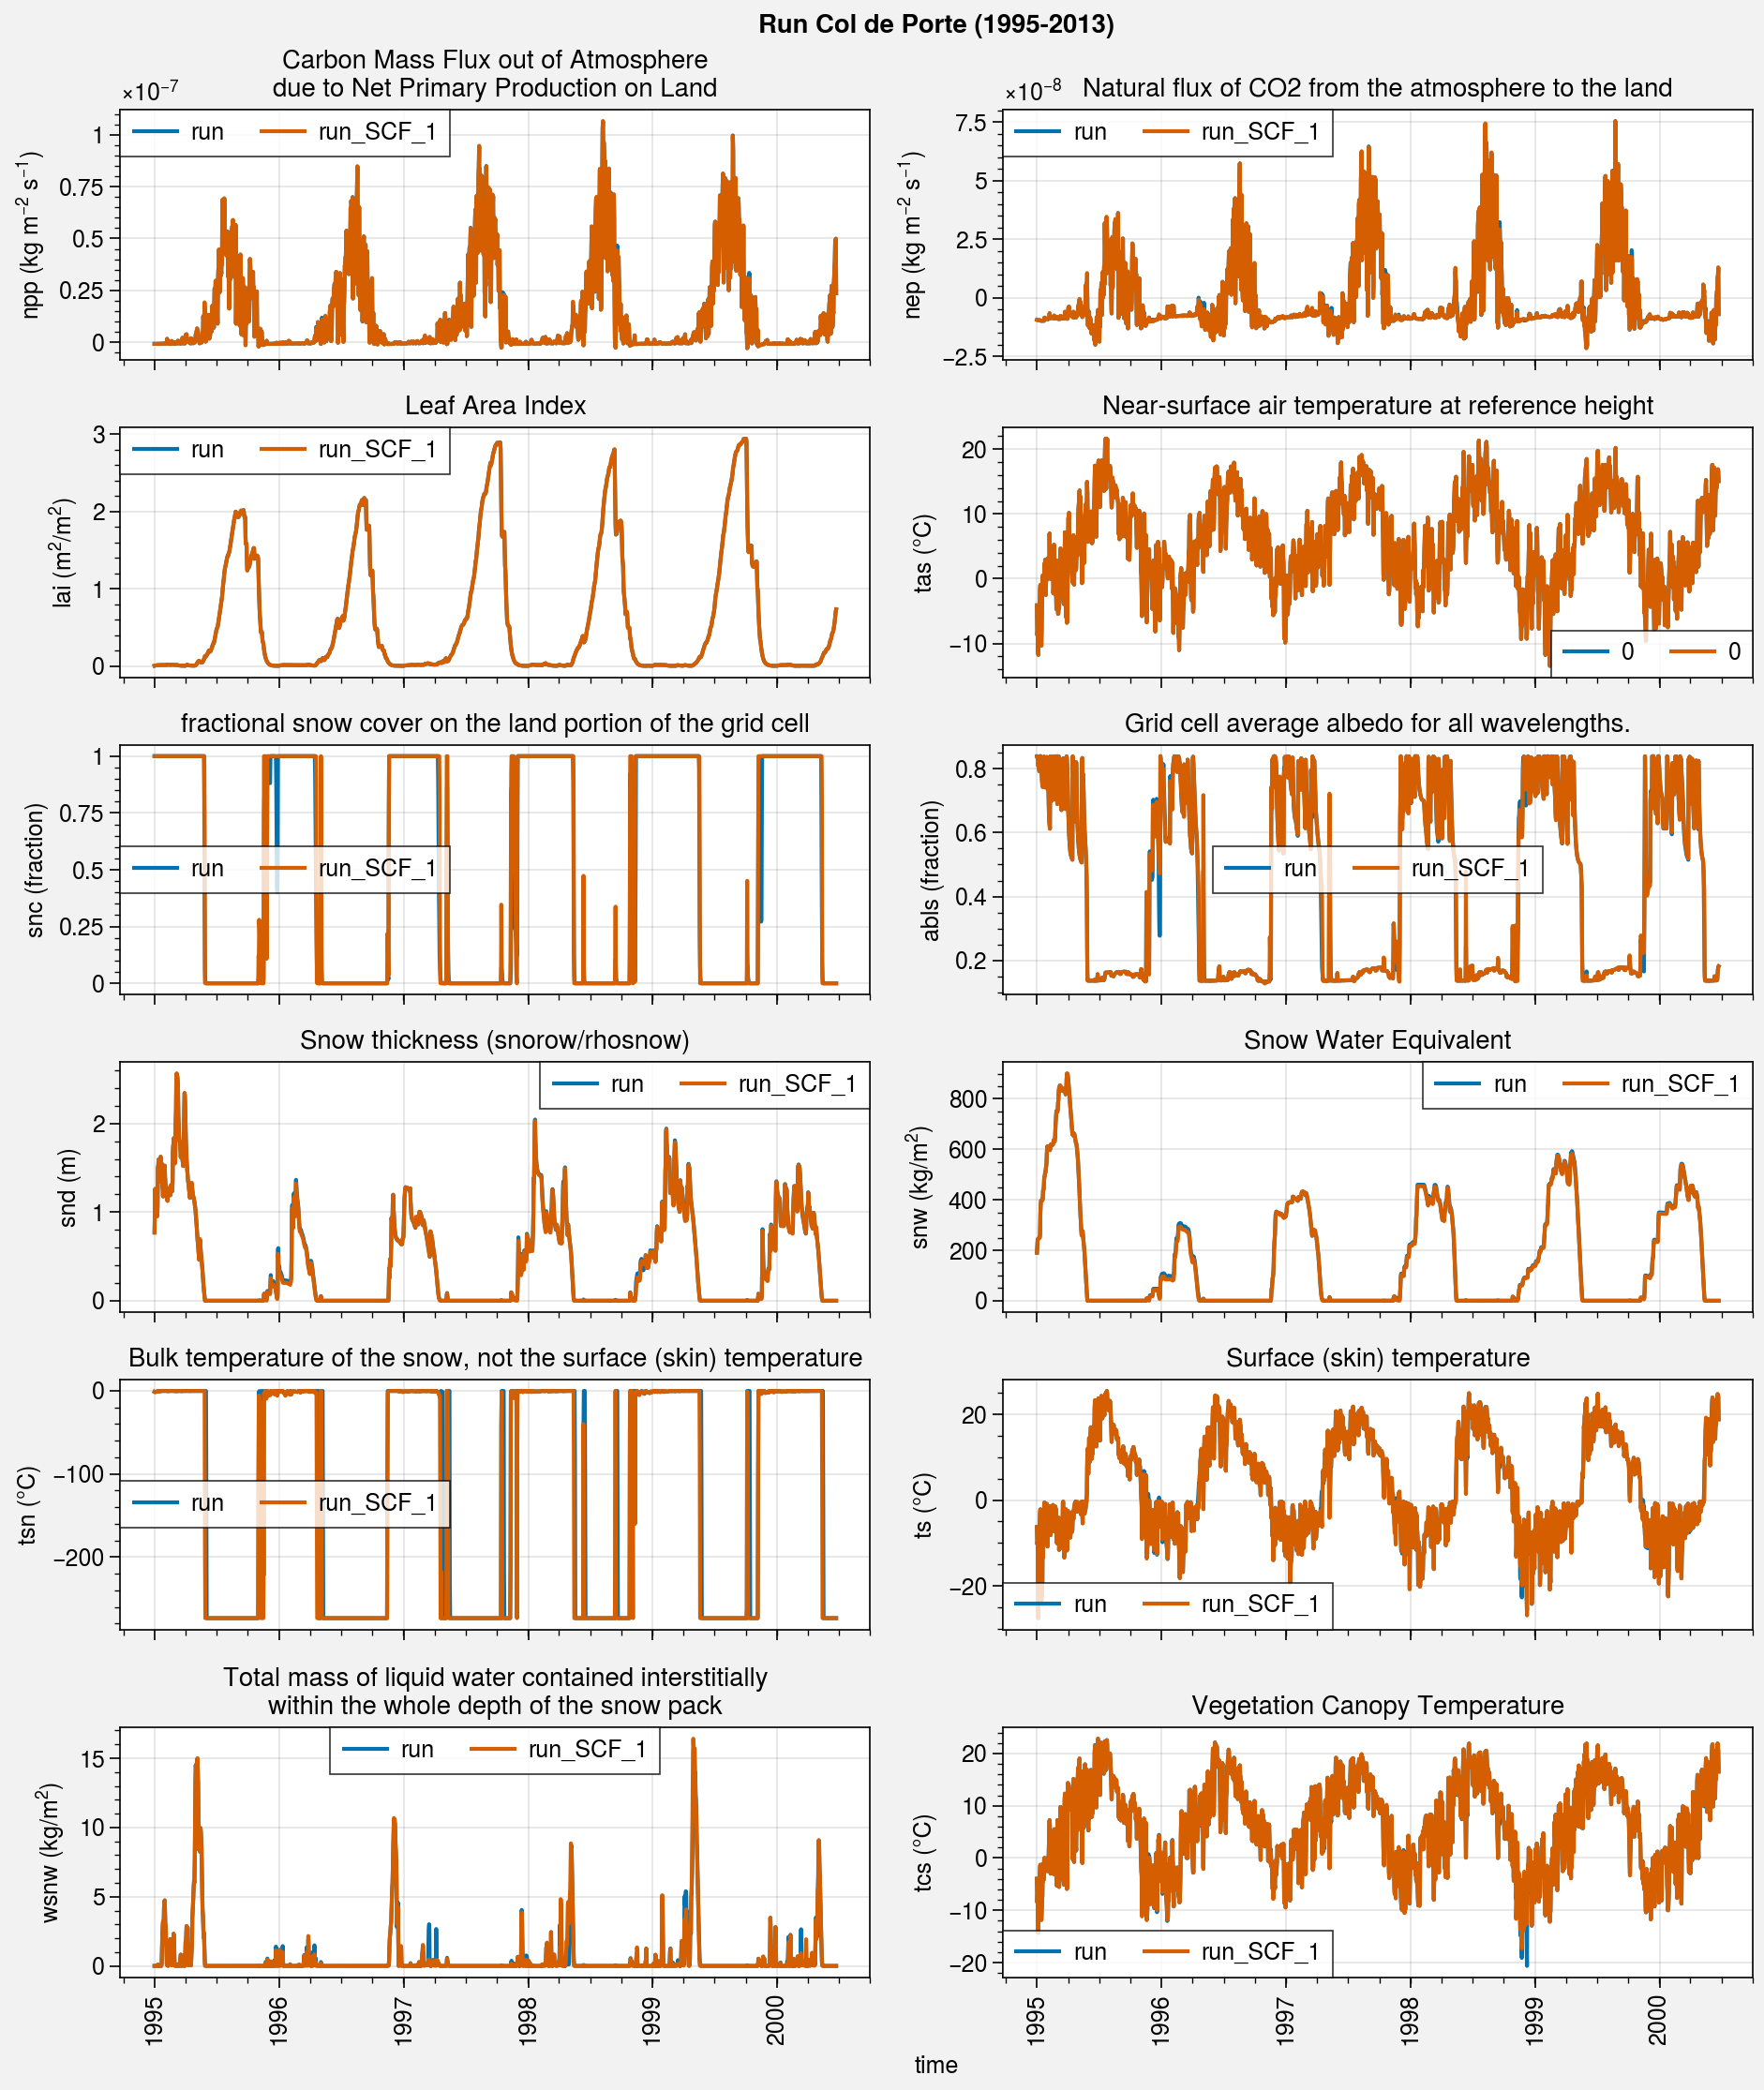

In [16]:
fig, axs = plot.subplots(ncols=2, nrows=6, aspect=3, axwidth=4, sharey=0)

# npp
axs[0].plot(npp_daily[0:i_end], label=label)
axs[0].plot(npp_daily2[0:i_end], label=label2)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp_daily.units+')')
axs[0].legend()

# nep
axs[1].plot(nep_daily[0:i_end], label=label)
axs[1].plot(nep_daily2[0:i_end], label=label2)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep_daily.units+')')
axs[1].legend()

# lai
axs[2].plot(lai_daily[0:i_end], label=label)
axs[2].plot(lai_daily2[0:i_end], label=label2)
axs[2].format(title=lai_daily.long_name, ylabel='lai ('+lai_daily.units+')')
axs[2].legend()

# tas
axs[3].plot(tas_daily[0:i_end]-273.15)
axs[3].plot(tas_daily2[0:i_end]-273.15)
axs[3].format(title=tas_daily.long_name, ylabel='tas (°C)')
axs[3].legend()

# snc
axs[4].plot(snc_daily[0:i_end], label=label)
axs[4].plot(snc_daily2[0:i_end], label=label2)
axs[4].format(title=snc_daily.long_name, ylabel='snc ('+snc_daily.units+')')
axs[4].legend()

# abls
axs[5].plot(albs_daily[0:i_end], label=label)
axs[5].plot(albs_daily2[0:i_end], label=label2)
axs[5].format(title=albs_daily.long_name, ylabel='abls ('+albs_daily.units+')')
axs[5].legend()

# snd
axs[6].plot(snd_daily[0:i_end], label=label)
axs[6].plot(snd_daily2[0:i_end], label=label2)
axs[6].format(title=snd_daily.long_name, ylabel='snd ('+snd_daily.units+')')
axs[6].legend()

# snw
axs[7].plot(snw_daily[0:i_end], label=label)
axs[7].plot(snw_daily2[0:i_end], label=label2)
axs[7].format(title='Snow Water Equivalent', ylabel='snw ('+snw_daily.units+')')
axs[7].legend()

# tsn
axs[8].plot(tsn_daily[0:i_end]-273.5, label=label)
axs[8].plot(tsn_daily2[0:i_end]-273.5, label=label2)
axs[8].format(title=tsn_daily.long_name, ylabel='tsn (°C)')
axs[8].legend()

# ts
axs[9].plot(ts_daily[0:i_end]-273.5, label=label)
axs[9].plot(ts_daily2[0:i_end]-273.5, label=label2)
axs[9].format(title=ts_daily.long_name, ylabel='ts (°C)')
axs[9].legend()

# wsnw
axs[10].plot(wsnw_daily[0:i_end], label=label)
axs[10].plot(wsnw_daily2[0:i_end], label=label2)
axs[10].format(title='Total mass of liquid water contained interstitially\nwithin the whole depth of the snow pack', ylabel='wsnw ('+snw_daily.units+')')
axs[10].legend()

# tcs
axs[11].plot(tcs_daily[0:i_end], label=label)
axs[11].plot(tcs_daily2[0:i_end], label=label2)
axs[11].format(title=tcs_daily.long_name, ylabel='tcs (°C)')
axs[11].legend()


# tsl_daily = xr.open_dataset(path+'/tsl_'+freq+'.nc').tsl
# tcs_daily = xr.open_dataset(path+'/tcs_'+freq+'.nc').tcs



fig.suptitle('Run Col de Porte (1995-2013)')

In [29]:
tsl_daily.long_name

'Temperature of each soil layer. Reported as missing for grid cells with no land.'

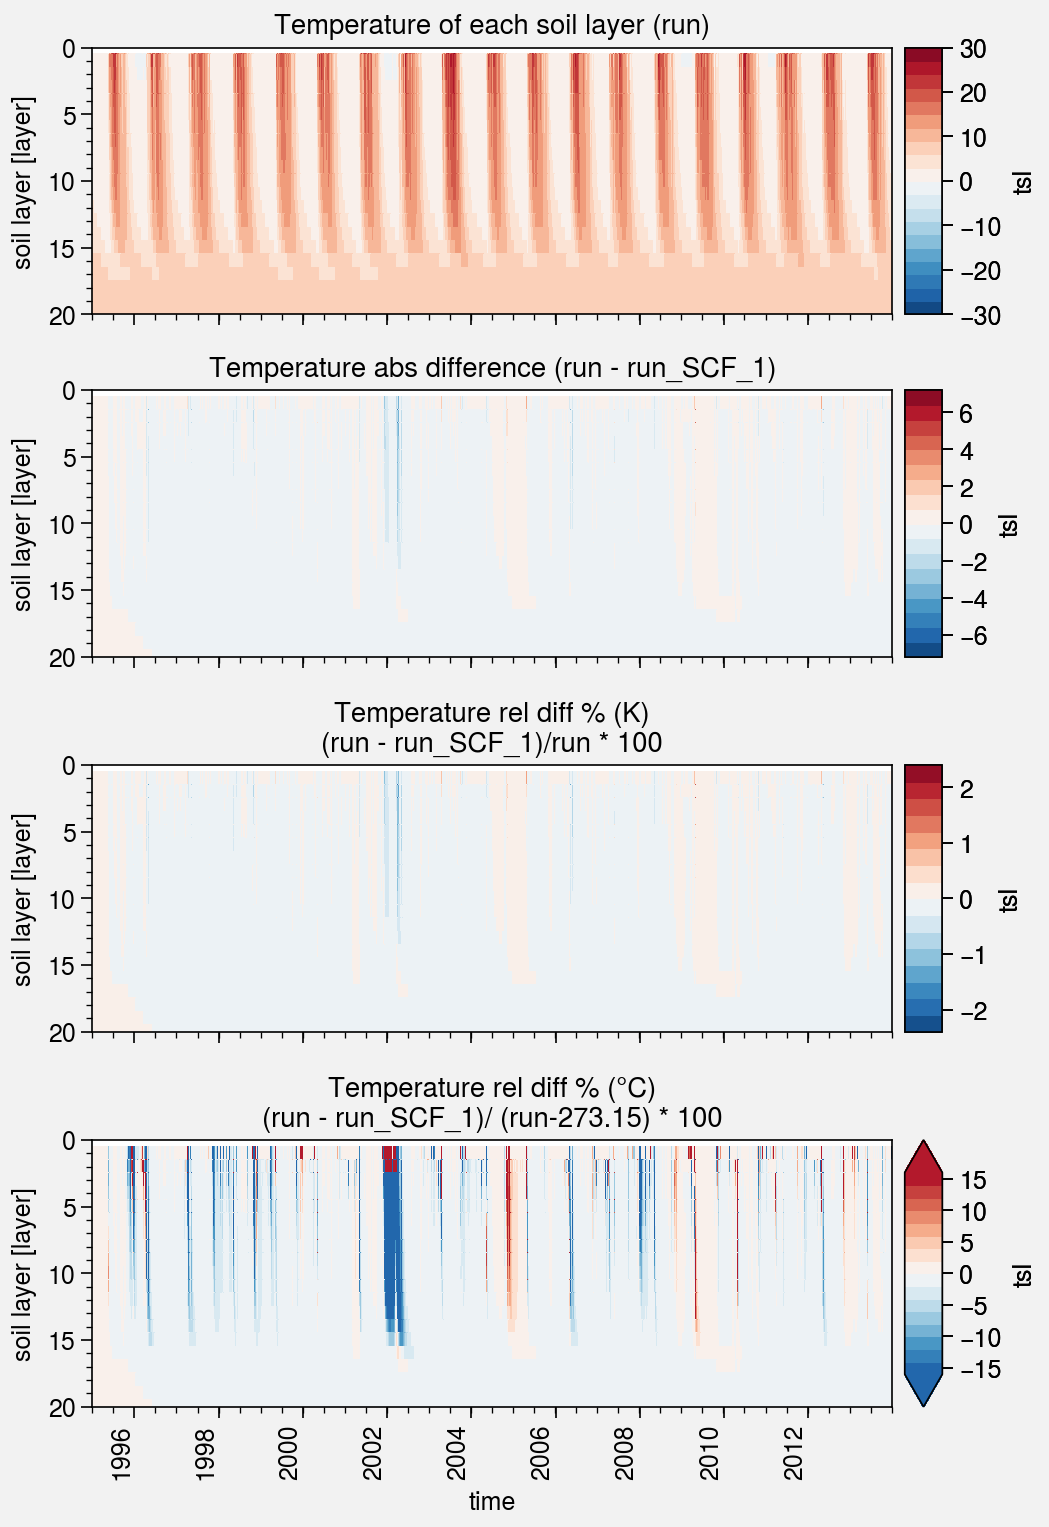

In [18]:
fig, axs = plot.subplots(ncols=1, nrows=4, aspect=3, axwidth=4, sharey=0)

(tsl_daily-273.15).plot(x='time', ylim=(20, 0), ax=axs[0], levels=20)
axs[0].format(title='Temperature of each soil layer ('+label+')')

(tsl_daily - tsl_daily2).plot(x='time', ylim=(20, 0), ax=axs[1], levels=20)
axs[1].format(title='Temperature abs difference ('+label+' - '+label2+')')

((tsl_daily - tsl_daily2)/tsl_daily * 100).plot(x='time', ylim=(20, 0), ax=axs[2], levels=20)
axs[2].format(title='Temperature rel diff % (K)\n('+label+' - '+label2+')/'+label+' * 100')

((tsl_daily - tsl_daily2)/ (tsl_daily-273.15) * 100).plot(x='time', ylim=(20, 0), ax=axs[3], levels=20, robust=True)
axs[3].format(title='Temperature rel diff % (°C)\n('+label+' - '+label2+')/ ('+label+'-273.15) * 100')
